In [1]:
# Import libraries
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataframe and encode categorical features

traders_df = pd.read_csv('IMC_Trading_2018-Quant_Trader_Applicant_Data_Cleaned_3.csv')
traders_df = traders_df.rename(columns={'index': 'Applicant #'})
traders_df = traders_df[traders_df['Candidate_Status'] != 'In Progress']
traders_df = traders_df.drop(['Applicant #', 'Unnamed: 0', 'ID', 'Jobs Applied', ' Applications'], axis=1)
traders_df

,Job_Posting_Title,Candidate_Status,University,Codility Battleship,Saville Diagramatic,Saville Numerical,Last Degree,Will require visa sponsorship,Sponsorship,Best standardized test,Best Score,Major,GPA,Graduation Date,Last Stage,Disposition Reason,Applied On
0,REQ-00438 Graduate Quant Trader (Open),Application Process Ended,Columbia University,0,99,96,Masters Degree,Yes,No,Other,0.00,Mathematics,3.50,2018-12,First Round Interview,Failed interview - technical,2018-08
1,REQ-00438 Graduate Quant Trader (Open),Application Process Ended,Columbia University,0,99,96,Masters Degree,Yes,No,Other,0.00,Mathematical Sciences and Economics,3.50,2018-12,First Round Interview,Failed interview - technical,2018-08
2,REQ-00438 Graduate Quant Trader (Open),Application Process Ended,UIUC,12,98,82,Other,No,Yes,Other,0.00,Computer Science,0.00,2018-12,First Round Interview,Failed interview - technical,2018-09
3,REQ-00438 Graduate Quant Trader (Open),Application Process Ended,UIUC,12,98,82,Other,No,Yes,Other,0.00,Economics,0.00,2018-12,First Round Interview,Failed interview - technical,2018-09
4,REQ-00438 Graduate Quant Trader (Open),Application Process Ended,University of Pennsylvania,0,93,90,Bachelor Degree,Yes,No,ACT,91.67,Computer Science,3.11,2019-05,First Round Interview,Failed Video Interview,2018-08
5,REQ-00438 Graduate Quant Trader (Open),Application Process Ended,Columbia University,0,99,98,Bachelor Degree,Yes,No,SAT,100.00,Financial Engineering,3.90,2019-05,First Round Interview,Failed Video Interview,2018-09
6,REQ-00438 Graduate Quant Trader (Open),Application Process Ended,University of Chicago,0,99,99,Bachelor Degree,Yes,Yes,ACT,94.44,Mathematics,3.81,2019-06,First Round Interview,Failed Video Interview,2018-09
7,REQ-00438 Graduate Quant Trader (Open),Application Process Ended,University of Michigan,0,0,0,Masters Degree,Yes,Yes,Other,0.00,Mathematics,3.86,2018-12,Applied,Moved To Another Requisition,2018-09
8,REQ-00438 Graduate Quant Trader (Open),Application Process Ended,University of Michigan,0,0,0,Masters Degree,Yes,Yes,Other,0.00,Economics and Finance,3.86,2018-12,Applied,Moved To Another Requisition,2018-09
9,REQ-00438 Graduate Quant Trader (Open),Application Process Ended,University of Michigan,0,0,0,Masters Degree,Yes,Yes,Other,0.00,Quantitative Finance,3.86,2018-12,Applied,Moved To Another Requisition,2018-09


In [42]:
# Queries
print((traders_df[(traders_df['Last Stage'] == 'Offer')].groupby('University').size() / traders_df.groupby('University').size()).nlargest(20))
print('\n')
print(traders_df[(traders_df['Last Stage'] == 'Offer')].groupby('University').size().nlargest(20))
print('\n')
print(traders_df.groupby('University').size().nlargest(20))

University
WASHINGTON UNIVERS ITY IN S T. LOUIS    1.000000
Wesleyan University                     1.000000
Stephen M. Ross School of Business      0.666667
BITS PILANI                             0.500000
Tufts University                        0.500000
University of Nebraska                  0.500000
Harvey Mudd College                     0.142857
Vanderbilt University                   0.133333
Yale University                         0.114286
Princeton                               0.096154
University of Virginia                  0.095238
UC Berkeley                             0.083333
University of Pennsylvania              0.062500
Harvard University                      0.060976
University of Waterloo                  0.054545
Northwestern University                 0.054054
Dartmouth College                       0.050000
Baruch College                          0.048780
Brown                                   0.047619
Johns Hopkins University                0.047619
dtype: fl

### Classification steps:
1. Normalize/standardize data
2. Categorical feature encoding/transformation
3. Feature engineering: generation, selection, removal (correlation analysis, add higher-order terms)
4. Apply different models, tune hyperparameters via grid search (e.g. regularization param)

In [3]:
features = np.array(traders_df.columns)
continuous_features = ['Codility Battleship', 'Saville Diagramatic', 'Saville Numerical', 'Best Score', 'GPA']
categorical_features = np.setdiff1d(features, continuous_features)
categorical_features

array(['Applied On', 'Best standardized test', 'Candidate_Status',
       'Disposition Reason', 'Graduation Date', 'Job_Posting_Title',
       'Last Degree', 'Last Stage', 'Major', 'Sponsorship', 'University',
       'Will require visa sponsorship'], dtype=object)

In [4]:
# More data cleaning

# Ensures that missing values are unique across columns so one-hot encoding method doesn't complain about duplicate columns
def replace_missing_vals(val, prefix):
    if val == 'Not Listed':
        return prefix + ' Not Listed'
    return val

# Drop unnecessary columns
traders_df = traders_df.drop(['Candidate_Status', 'Best standardized test', 'Disposition Reason'], axis=1)

traders_df['Sponsorship'] = traders_df['Sponsorship'].apply(lambda sponsorship : 'Sponsorship ' + sponsorship)
traders_df['Will require visa sponsorship'] = traders_df['Will require visa sponsorship'].apply(lambda sponsorship : 'Visa Required ' + sponsorship)
traders_df['Major'] = traders_df['Major'].apply(lambda major : replace_missing_vals(major, 'Major'))
traders_df['Last Degree'] = traders_df['Last Degree'].apply(lambda degree : replace_missing_vals(degree, 'Degree'))

# Split into full-time and intern applicants
full_time_traders_appl = traders_df[traders_df['Job_Posting_Title'] == 'REQ-00438 Graduate Quant Trader (Open)']
intern_traders_appl = traders_df[traders_df['Job_Posting_Title'] == 'REQ-00446 Quant Trader Intern - Summer 2019 (Fill Date: 06/10/2019)']
full_time_traders_appl_labels = full_time_traders_appl['Last Stage']
intern_traders_appl_labels = intern_traders_appl['Last Stage']
full_time_traders_appl = full_time_traders_appl.drop('Last Stage', axis=1)
intern_traders_appl = intern_traders_appl.drop('Last Stage', axis=1)
print(full_time_traders_appl.shape)
print(intern_traders_appl.shape)

(1569, 13)
(2423, 13)


### Intern Trader Applicants Models

In [5]:
# 1. Standardize (0 mean, unit variance) or normalize data
from sklearn.preprocessing import StandardScaler

continuous_data = full_time_traders_appl[continuous_features]

std = StandardScaler()
scaler = std.fit(continuous_data)
continuous_data = scaler.transform(continuous_data)
full_time_traders_appl[continuous_features] = continuous_data
full_time_traders_appl

,Job_Posting_Title,University,Codility Battleship,Saville Diagramatic,Saville Numerical,Last Degree,Will require visa sponsorship,Sponsorship,Best Score,Major,GPA,Graduation Date,Applied On
0,REQ-00438 Graduate Quant Trader (Open),Columbia University,-0.180757,0.742785,0.834521,Masters Degree,Visa Required Yes,Sponsorship No,-0.197434,Mathematics,0.105412,2018-12,2018-08
1,REQ-00438 Graduate Quant Trader (Open),Columbia University,-0.180757,0.742785,0.834521,Masters Degree,Visa Required Yes,Sponsorship No,-0.197434,Mathematical Sciences and Economics,0.105412,2018-12,2018-08
2,REQ-00438 Graduate Quant Trader (Open),UIUC,0.545977,0.719751,0.493541,Other,Visa Required No,Sponsorship Yes,-0.197434,Computer Science,-3.444163,2018-12,2018-09
3,REQ-00438 Graduate Quant Trader (Open),UIUC,0.545977,0.719751,0.493541,Other,Visa Required No,Sponsorship Yes,-0.197434,Economics,-3.444163,2018-12,2018-09
4,REQ-00438 Graduate Quant Trader (Open),University of Pennsylvania,-0.180757,0.604583,0.688386,Bachelor Degree,Visa Required Yes,Sponsorship No,-0.046243,Computer Science,-0.290112,2019-05,2018-08
5,REQ-00438 Graduate Quant Trader (Open),Columbia University,-0.180757,0.742785,0.883232,Bachelor Degree,Visa Required Yes,Sponsorship No,-0.032504,Financial Engineering,0.511078,2019-05,2018-09
6,REQ-00438 Graduate Quant Trader (Open),University of Chicago,-0.180757,0.742785,0.907588,Bachelor Degree,Visa Required Yes,Sponsorship Yes,-0.041674,Mathematics,0.419803,2019-06,2018-09
7,REQ-00438 Graduate Quant Trader (Open),University of Michigan,-0.180757,-1.537538,-1.503627,Masters Degree,Visa Required Yes,Sponsorship Yes,-0.197434,Mathematics,0.470512,2018-12,2018-09
8,REQ-00438 Graduate Quant Trader (Open),University of Michigan,-0.180757,-1.537538,-1.503627,Masters Degree,Visa Required Yes,Sponsorship Yes,-0.197434,Economics and Finance,0.470512,2018-12,2018-09
9,REQ-00438 Graduate Quant Trader (Open),University of Michigan,-0.180757,-1.537538,-1.503627,Masters Degree,Visa Required Yes,Sponsorship Yes,-0.197434,Quantitative Finance,0.470512,2018-12,2018-09


### Types of Features:
1. Ordinal features: features with values that can be ordered (e.g. age bins, preference scale from 1-10, dates, economic status [low, medium, high], etc.) 
2. Nominal features: features with values that cannot be ordered (e.g. sex, sport, university, product type, etc.)

### Types of Classic Encodings:
1. One-hot encoding (dummy encoding): used for nominal (very often) and ordinal features
2. Ordinal encoding: used for ordinal features (1 to k)
3. Binary encoding
4. BaseN encoding
5. Hashing encoding

### Encoding for this dataset:
1. Applied On (ordinal): date ordinal encoding (done)
2. Graduation Date (ordinal): date ordinal encoding (done)
3. Major (nominal): one-hot encoding
4. Last Degree (ordinal): ordinal encoding
5. University (nominal): one-hot encoding
6. Sponsorship (nominal): one-hot encoding
7. Will require visa sponsorship (nominal): one-hot encoding
8. Last Stage (ordinal - CLASS LABEL): ordinal encoding

Should only be standardized (like continuous data) if regression model is used; can leave as is for tree-based

In [6]:
# 2. Categorical feature encodings

ordinal_features = ['Applied On', 'Graduation Date', 'Last Degree']
nominal_features = ['Major', 'University', 'Sponsorship', 'Will require visa sponsorship']
class_label = 'Last Stage'

for ordinal_feature in ordinal_features:
    print(full_time_traders_appl.groupby(ordinal_feature).size())
for nominal_feature in nominal_features:
    print(full_time_traders_appl.groupby(nominal_feature).size())

Applied On
2018-07    188
2018-08    431
2018-09    581
2018-10    247
2018-11     51
2018-12     71
dtype: int64
Graduation Date
1996-09      1
1996-12      1
1997-02      2
2010-05      1
2012-01      1
2014-07      1
2015-05      2
2015-06      2
2015-07      1
2015-12      7
2016-01      5
2016-03      2
2016-05      3
2016-06      2
2016-08      1
2016-12     12
2017-01      6
2017-02      3
2017-05     20
2017-06      2
2017-08      3
2017-09      1
2017-11      2
2017-12     28
2018-01      8
2018-02      4
2018-03      9
2018-04      3
2018-05     83
2018-06     40
2018-07      4
2018-08     39
2018-09     13
2018-10     10
2018-11     10
2018-12    579
2019-01     36
2019-02     10
2019-03      9
2019-04     37
2019-05    377
2019-06    101
2019-07     13
2019-08     17
2019-09      3
2019-12     26
2020-05      2
2020-10      4
2020-12      3
2021-05      2
2022-04      1
Not Lis     17
dtype: int64
Last Degree
Bachelor Degree      501
Degree Not Listed      3
Masters Degree 

In [7]:
from datetime import datetime
from dateutil.relativedelta import relativedelta

def convert_date_to_ordinal(date):
    if date == 'Not Lis':
        date = '2019-05' # Replaced with second mode of data (will replace with date mean later) for Graduation Date
    date = datetime.strptime(date, '%Y-%m').date()
    base_date = datetime.strptime('1990-01', '%Y-%m').date()
    date_diff = relativedelta(date, base_date)
    months_diff = date_diff.years * 12 + date_diff.months 
    return months_diff

full_time_traders_appl['Applied On'] = full_time_traders_appl['Applied On'].apply(lambda date : convert_date_to_ordinal(date))
full_time_traders_appl['Graduation Date'] = full_time_traders_appl['Graduation Date'].apply(lambda date : convert_date_to_ordinal(date))

In [8]:
# Using pd.get_dummies for one-hot encoding since we're dealing with pandas dataframes

def one_hot_encode_features(df, features):
    for feature in features:
        one_hot_feature = pd.get_dummies(df[feature])
        df = df.drop(feature, axis=1)
        df = df.join(one_hot_feature)
    return df

full_time_traders_appl = one_hot_encode_features(full_time_traders_appl, nominal_features)
full_time_traders_appl

,Job_Posting_Title,Codility Battleship,Saville Diagramatic,Saville Numerical,Last Degree,Best Score,GPA,Graduation Date,Applied On,Accounting,...,WorldQuant University,Yale University,York University- Lassonde School of Engineering,the College of Literature,Sponsorship No,Sponsorship Not Listed,Sponsorship Yes,Visa Required No,Visa Required Not Listed,Visa Required Yes
0,REQ-00438 Graduate Quant Trader (Open),-0.180757,0.742785,0.834521,Masters Degree,-0.197434,0.105412,347,343,0,...,0,0,0,0,1,0,0,0,0,1
1,REQ-00438 Graduate Quant Trader (Open),-0.180757,0.742785,0.834521,Masters Degree,-0.197434,0.105412,347,343,0,...,0,0,0,0,1,0,0,0,0,1
2,REQ-00438 Graduate Quant Trader (Open),0.545977,0.719751,0.493541,Other,-0.197434,-3.444163,347,344,0,...,0,0,0,0,0,0,1,1,0,0
3,REQ-00438 Graduate Quant Trader (Open),0.545977,0.719751,0.493541,Other,-0.197434,-3.444163,347,344,0,...,0,0,0,0,0,0,1,1,0,0
4,REQ-00438 Graduate Quant Trader (Open),-0.180757,0.604583,0.688386,Bachelor Degree,-0.046243,-0.290112,352,343,0,...,0,0,0,0,1,0,0,0,0,1
5,REQ-00438 Graduate Quant Trader (Open),-0.180757,0.742785,0.883232,Bachelor Degree,-0.032504,0.511078,352,344,0,...,0,0,0,0,1,0,0,0,0,1
6,REQ-00438 Graduate Quant Trader (Open),-0.180757,0.742785,0.907588,Bachelor Degree,-0.041674,0.419803,353,344,0,...,0,0,0,0,0,0,1,0,0,1
7,REQ-00438 Graduate Quant Trader (Open),-0.180757,-1.537538,-1.503627,Masters Degree,-0.197434,0.470512,347,344,0,...,0,0,0,0,0,0,1,0,0,1
8,REQ-00438 Graduate Quant Trader (Open),-0.180757,-1.537538,-1.503627,Masters Degree,-0.197434,0.470512,347,344,0,...,0,0,0,0,0,0,1,0,0,1
9,REQ-00438 Graduate Quant Trader (Open),-0.180757,-1.537538,-1.503627,Masters Degree,-0.197434,0.470512,347,344,0,...,0,0,0,0,0,0,1,0,0,1


In [9]:
degree_mapping = {
    'Degree Not Listed' : 0,
    'Other' : 0,
    'Bachelor Degree' : 1,
    'Masters Degree' : 2,
    'PhD' : 3
}

stage_mapping = {
    'Applied' : 0,
    'Assessment' : 1,
    'First Round Interview' : 2,
    'Final Round' : 3,
    'Offer' : 4
}

full_time_traders_appl['Last Degree'] = full_time_traders_appl['Last Degree'].apply(lambda degree : degree_mapping[degree])
full_time_traders_appl_labels = full_time_traders_appl_labels.apply(lambda stage : stage_mapping[stage])

In [10]:
full_time_traders_appl = full_time_traders_appl.drop('Job_Posting_Title', axis=1)
full_time_traders_appl

,Codility Battleship,Saville Diagramatic,Saville Numerical,Last Degree,Best Score,GPA,Graduation Date,Applied On,Accounting,Actuarial Science,...,WorldQuant University,Yale University,York University- Lassonde School of Engineering,the College of Literature,Sponsorship No,Sponsorship Not Listed,Sponsorship Yes,Visa Required No,Visa Required Not Listed,Visa Required Yes
0,-0.180757,0.742785,0.834521,2,-0.197434,0.105412,347,343,0,0,...,0,0,0,0,1,0,0,0,0,1
1,-0.180757,0.742785,0.834521,2,-0.197434,0.105412,347,343,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.545977,0.719751,0.493541,0,-0.197434,-3.444163,347,344,0,0,...,0,0,0,0,0,0,1,1,0,0
3,0.545977,0.719751,0.493541,0,-0.197434,-3.444163,347,344,0,0,...,0,0,0,0,0,0,1,1,0,0
4,-0.180757,0.604583,0.688386,1,-0.046243,-0.290112,352,343,0,0,...,0,0,0,0,1,0,0,0,0,1
5,-0.180757,0.742785,0.883232,1,-0.032504,0.511078,352,344,0,0,...,0,0,0,0,1,0,0,0,0,1
6,-0.180757,0.742785,0.907588,1,-0.041674,0.419803,353,344,0,0,...,0,0,0,0,0,0,1,0,0,1
7,-0.180757,-1.537538,-1.503627,2,-0.197434,0.470512,347,344,0,0,...,0,0,0,0,0,0,1,0,0,1
8,-0.180757,-1.537538,-1.503627,2,-0.197434,0.470512,347,344,0,0,...,0,0,0,0,0,0,1,0,0,1
9,-0.180757,-1.537538,-1.503627,2,-0.197434,0.470512,347,344,0,0,...,0,0,0,0,0,0,1,0,0,1


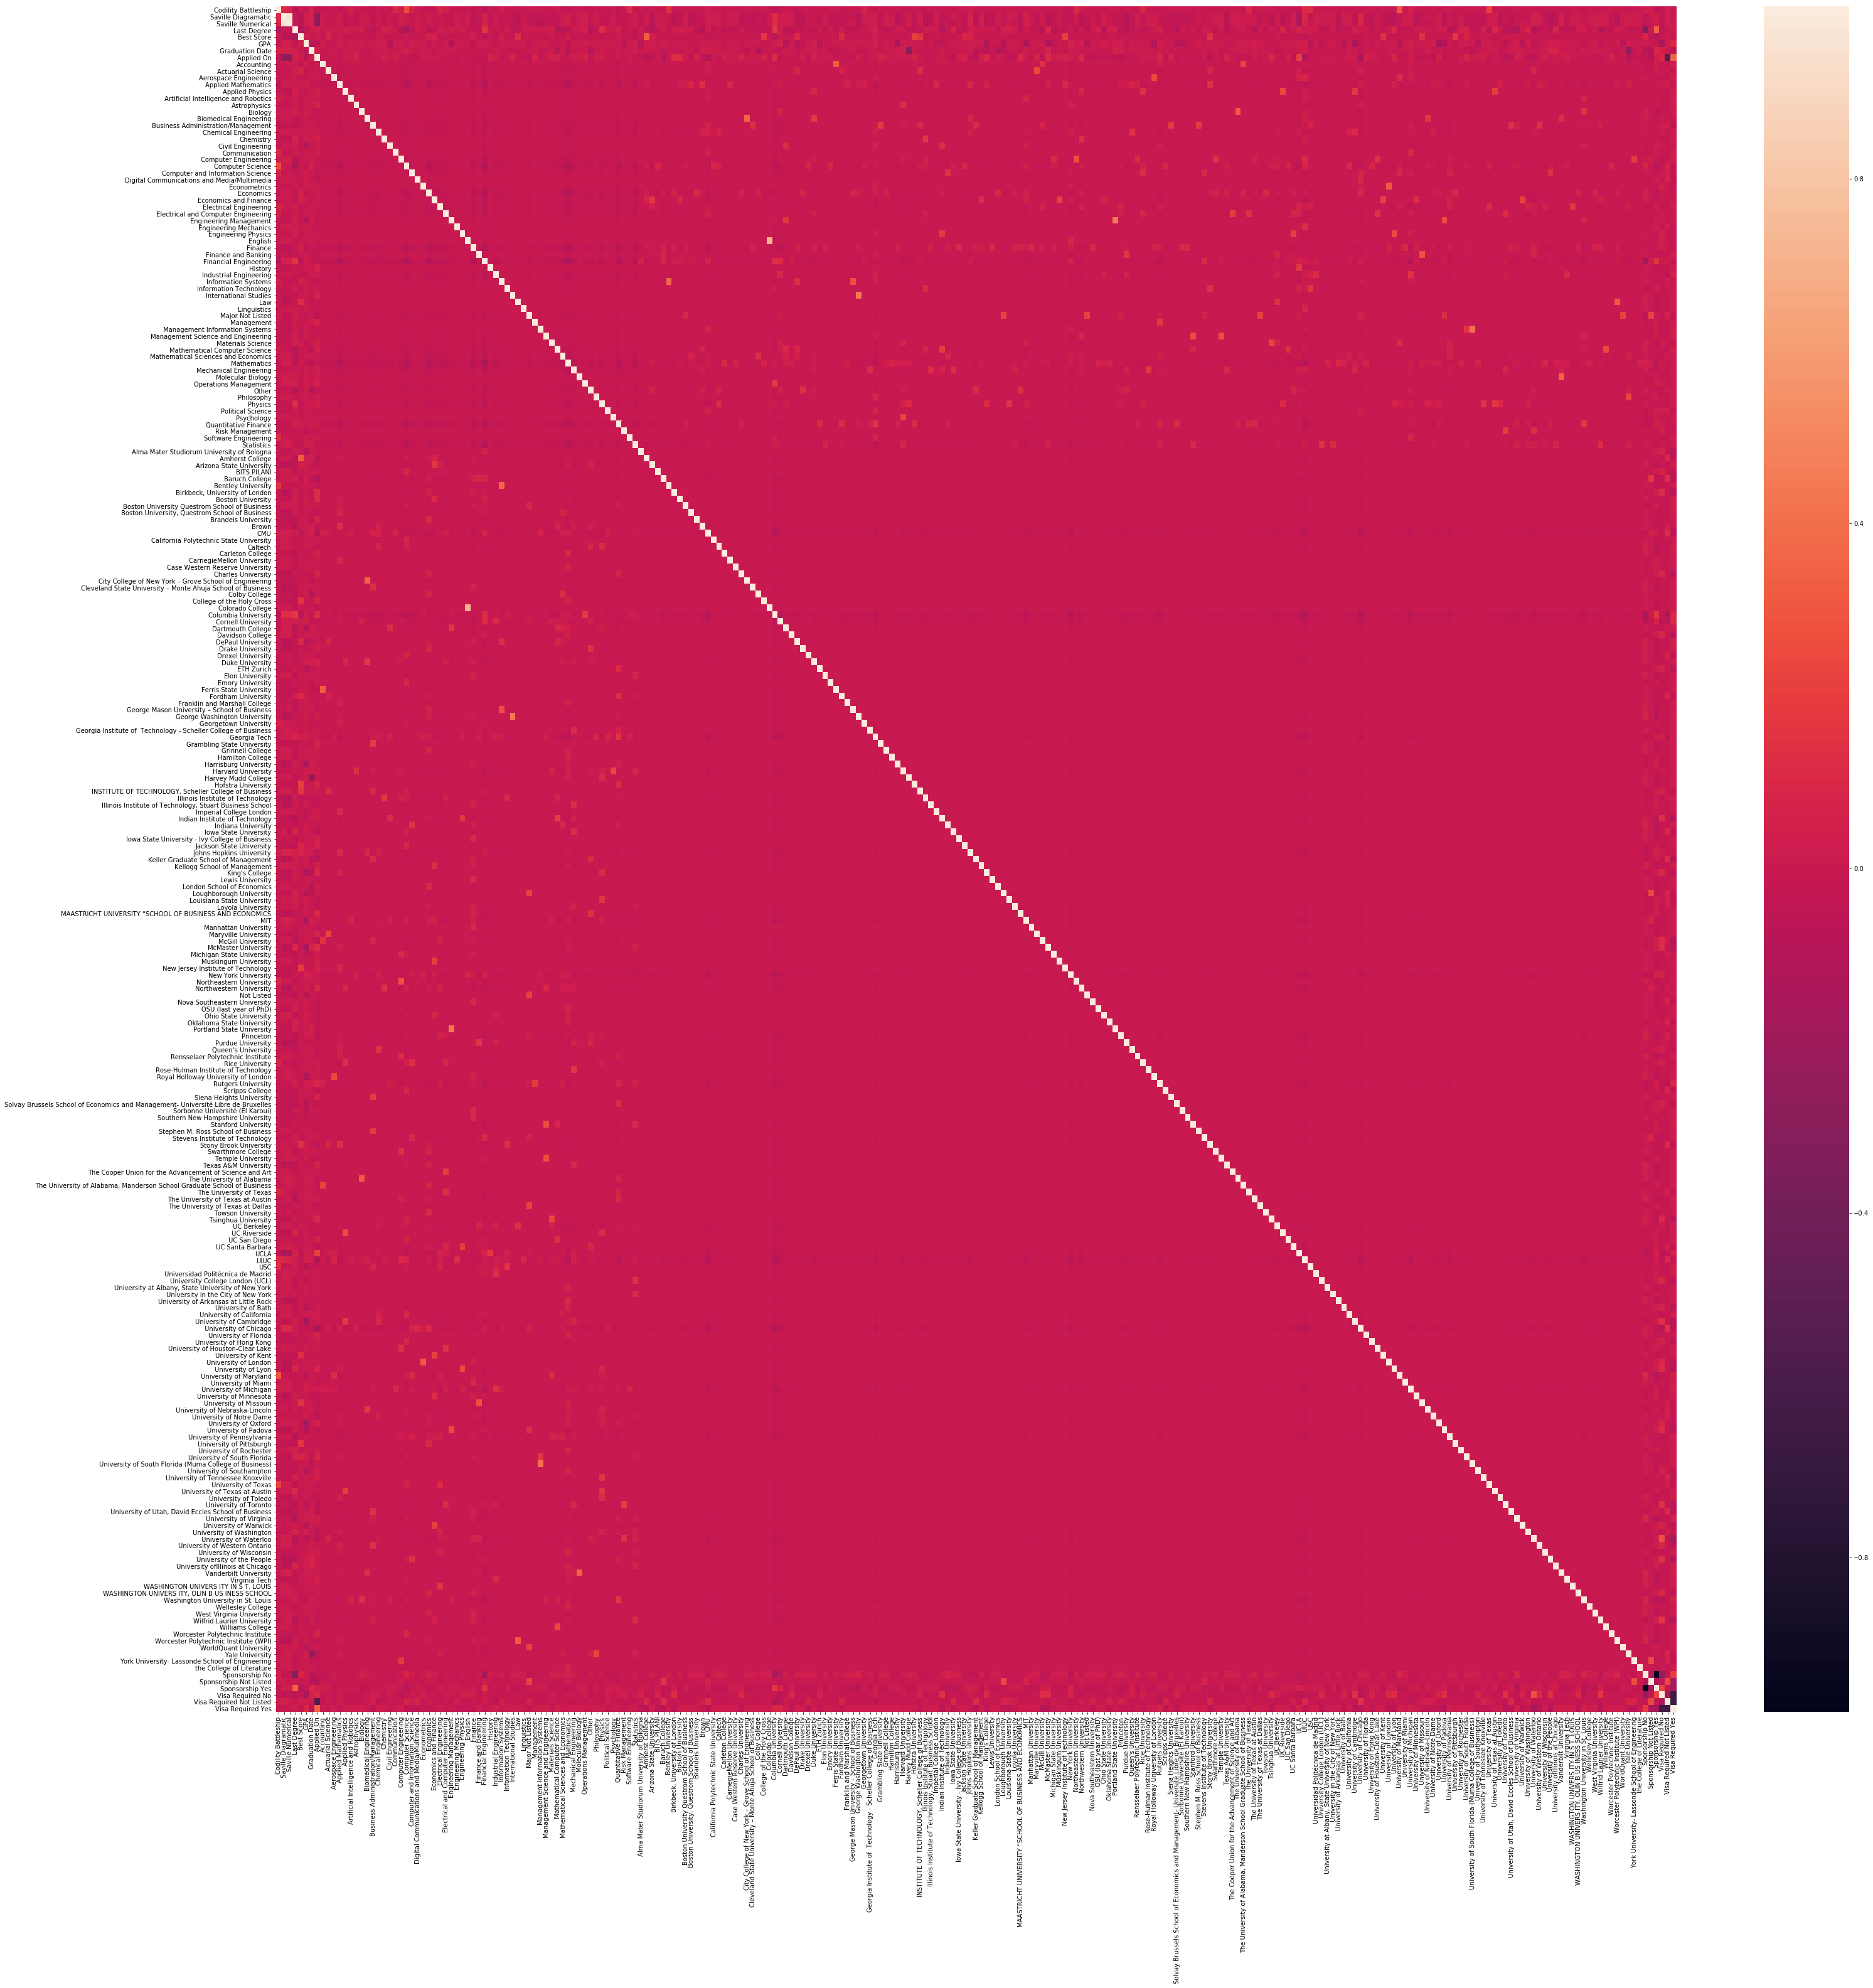

In [11]:
# Feature Correlation Analysis

import seaborn as sns

corr = full_time_traders_appl.corr()
corr.to_csv('Feature_Correlations.csv')

corr_file = open('Feature_Correlation_Analysis.txt', 'w+')
for i in range(0, corr.shape[0]):
    row = corr.iloc[i]
    directly_correlated_features = 'Highest correlations: %s\n' % str(row.nlargest(10))
    corr_file.write(directly_correlated_features)
    inversely_correlated_features = 'Smallest correlations: %s\n' % str(row.nsmallest(10))
    corr_file.write(inversely_correlated_features)
    corr_file.write('\n\n')

plt.figure(figsize=(50,50))
heatmap = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)
plt.savefig("Feature_Correlation_Heatmap.png")
plt.show()

In [18]:
# Feature-Label Correlation Analysis

full_time_traders_appl_with_labels = full_time_traders_appl.copy()
full_time_traders_appl_with_labels['Last Stage'] = full_time_traders_appl_labels

corr = full_time_traders_appl_with_labels.corr()
class_corr = corr['Last Stage'][:]
print('Inverse correlations: ', class_corr.nsmallest(30))
print('Direct correlations: ', class_corr.nlargest(30))

Inverse correlations:  Last Degree                             -0.220389
Applied On                              -0.140627
Major Not Listed                        -0.120788
UCLA                                    -0.115791
Sponsorship Yes                         -0.101657
Illinois Institute of Technology        -0.070746
Financial Engineering                   -0.066284
Worcester Polytechnic Institute (WPI)   -0.062909
George Washington University            -0.062909
University of the People                -0.056250
Finance                                 -0.053215
Stevens Institute of Technology         -0.053008
CMU                                     -0.052663
Visa Required No                        -0.049702
Rutgers University                      -0.049111
University of Minnesota                 -0.048698
Harrisburg University                   -0.048698
University of Padova                    -0.048698
McMaster University                     -0.048698
Keller Graduate School of M

### Important Considerations when Choosing ML Algo
1. Dimensionality of data (after cleaning and encoding)
2. Number of training examples
3. Presence/absence of outliers

### Multi-class Classification Algos
1. SVM (works well in datasets with high # features relative to training examples)
2. Neural networks (requires a LOT of training examples)
3. kNN (works well in low-dimensional space with normalized/standardized values)
4. Random forests
5. GBM: Adaboost, XGBoost
6. Linear, logistic, ordinal, ridge regression
7. Naive Bayes

### To improve classification model:
1. Remove some features (i.e. remove irrelevant features with little variance or weight, build 2 regression models: one for full-time applicants, one for intern applicants, remove rows with Disposition Reason as 'Application Received too Late')
2. Better encoding
3. Feature engineering/selection to remove collinearity: 
https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b
Coursera Course: https://www.coursera.org/learn/competitive-data-science/home/welcome
4. Try different regression models and decision trees (RandomForestRegressor, XGBoost, Lasso)
5. Tune regularization parameters
6. Rerun cleaning data script with modifications (further cleans University and GPA feature vals)
7. Run regression with k-fold cross validation

Questions:
1. Should I standardize/normalize data after encoding so I don't give the encoded (categorical) features too much weight compared to the continuous features?
2. What kind of baseline algo should I use?
3. Should I just completely remove features of very low importance (according to the rf model)?

In [13]:
# Method to plot confusion matrix of model's predictions

from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(title, y_pred, y_true, normalize):
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    classes = ['Applied', 'Assessment', 'First Round Interview', 'Final Round', 'Offer']
    
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return fig, ax

In [14]:
# ML Model #1: Random Forest

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score

import matplotlib.backends.backend_pdf
cm_pdf = matplotlib.backends.backend_pdf.PdfPages("RF_CMs.pdf")

rf = RandomForestClassifier(max_depth=25, n_estimators=125, max_features=200, min_samples_leaf=1)

# 1) Use k-fold cross validation (k = 10)
k = 10
avg_accuracy = 0.0
cm_fig = plt.figure()
for i in range(0, k):
    # Split dataset
    X_train, X_test, y_train, y_test = train_test_split(
        full_time_traders_appl, 
        full_time_traders_appl_labels, 
        stratify=full_time_traders_appl_labels, 
        test_size=0.2
    )
    
    rf.fit(X_train, y_train)
    y_pred_rf = rf.predict(X_test)
    model_accuracy = accuracy_score(y_pred_rf, y_test)
    avg_accuracy += model_accuracy
    print('Accuracy: ', model_accuracy)
    
    # 2) Out of Fold Validation (OOF) - *usually* more representative of test accuracy than k-fold cross validation
    '''
    oof_preds_log = cross_val_predict(rf, X_train, y_train.values, cv=10, n_jobs=1, method="predict")                              
    # Calculate RMSLE (RMSE of Log(1+y))
    cv_rmsle = np.sqrt(mean_squared_error(np.log1p(y_train.values), oof_preds_log))
    print("OOF RMSLE Score: {:.4f}\n".format(cv_rmsle))
    '''
    
    fig, ax = plot_confusion_matrix('Random Forest Model Confusion Matrix', y_pred_rf, y_test, True)
    cm_pdf.savefig(fig)
    
cm_pdf.close()
print('Average accuracy: ', avg_accuracy / k)

/Users/nishanth/anaconda/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


Accuracy:  0.7898089171974523
Accuracy:  0.8375796178343949
Accuracy:  0.8280254777070064
Accuracy:  0.7961783439490446
Accuracy:  0.7802547770700637
Accuracy:  0.7802547770700637
Accuracy:  0.802547770700637
Accuracy:  0.821656050955414
Accuracy:  0.8057324840764332
Accuracy:  0.767515923566879
Average accuracy:  0.8009554140127388


                                                    importance
Saville Numerical                                     0.326996
Saville Diagramatic                                   0.120937
GPA                                                   0.070895
Applied On                                            0.049629
Best Score                                            0.042855
Graduation Date                                       0.039584
Last Degree                                           0.018275
Georgia Tech                                          0.015840
CMU                                                   0.011962
UIUC                                                  0.011793
Major Not Listed                                      0.008611
Sponsorship No                                        0.008125
Financial Engineering                                 0.007888
Columbia University                                   0.007866
Sponsorship Yes                                       0

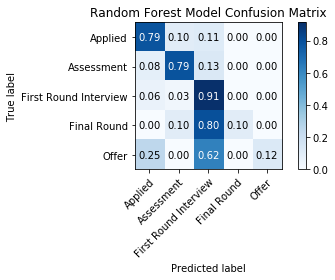

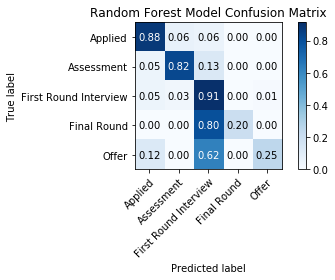

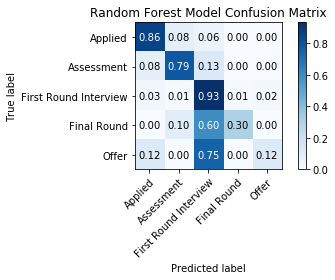

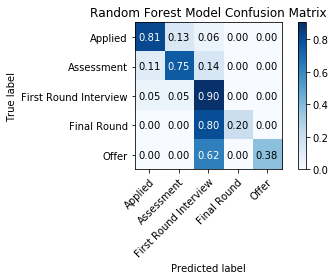

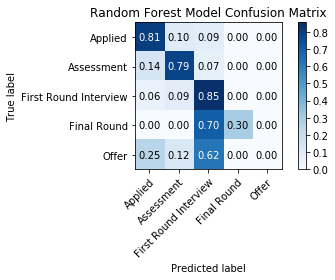

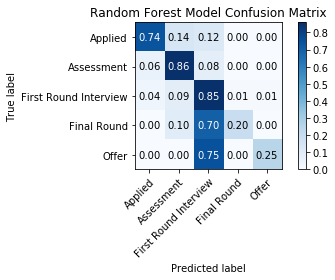

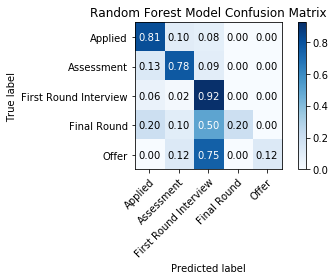

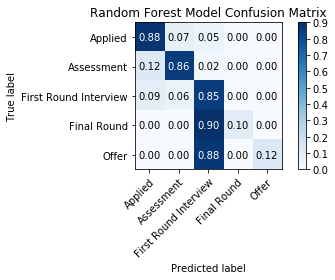

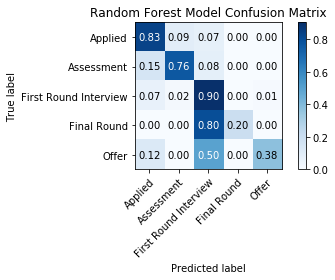

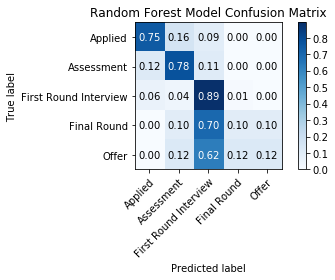

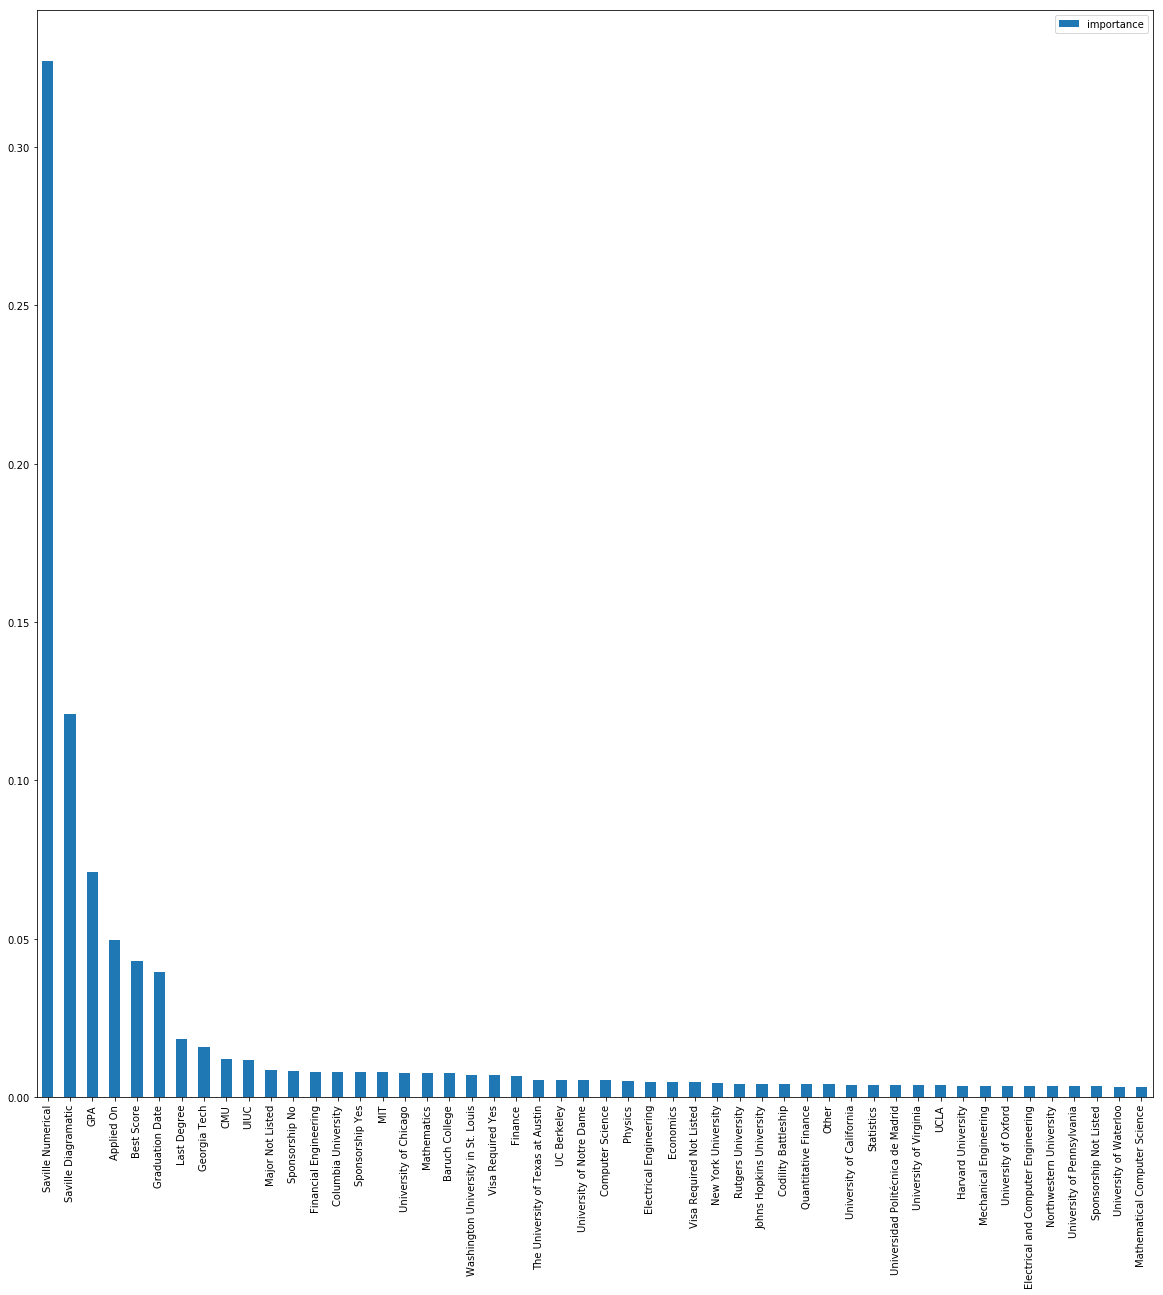

In [15]:
feature_importances = pd.DataFrame(rf.feature_importances_, 
                                   index = full_time_traders_appl.columns, 
                                   columns=['importance'])
feature_importances = feature_importances.sort_values('importance', ascending=False)
print(feature_importances)
plt.rcParams['figure.figsize'] = [20,20]
feature_importances[0:50].plot(kind='bar')
plt.show()

In [16]:
# ML Model #2: XGBoost
import xgboost as xgb

cm_pdf = matplotlib.backends.backend_pdf.PdfPages("GBT_CMs.pdf")

# 1) Use k-fold cross validation (k = 10)
k = 10
avg_accuracy = 0.0
cm_fig = plt.figure()
for i in range(0, k):
    # Split dataset
    X_train, X_test, y_train, y_test = train_test_split(
        full_time_traders_appl, 
        full_time_traders_appl_labels, 
        stratify=full_time_traders_appl_labels, 
        test_size=0.2
    )
    
    # Train XGBoost model
    dtrain = xgb.DMatrix(X_train, label=y_train)
    dtest = xgb.DMatrix(X_test, label=y_test)
    params = {'max_depth': 10, 'eta': .4, 'silent': 1, 'objective': 'multi:softprob', 'num_class': 5}
    num_rounds = 100
    evallist = [(dtest, 'eval'), (dtrain, 'train')]
    bst = xgb.train(params, dtrain, num_rounds, evallist)
    
    # Get predictions
    y_probs = bst.predict(dtest)
    sorted_y_probs_idx = [np.argsort(probs, kind='mergesort')[::-1] for probs in y_probs]
    y_diff = []
    for i in range(0, y_probs.shape[0]):
        probs = y_probs[i]
        sorted_y_prob_idx = sorted_y_probs_idx[i]
        y_diff.append(probs[sorted_y_prob_idx[0]] - probs[sorted_y_prob_idx[1]])
    y_pred = [probs_idx[0] for probs_idx in sorted_y_probs_idx]
    model_accuracy = accuracy_score(y_pred, y_test)
    print('Accuracy: ', model_accuracy)
    avg_accuracy += model_accuracy
    
    print('Prob diffs: ', np.sort(y_diff))
    diff_idx = np.where(y_pred != y_test)[0]
    y_diff = np.array(y_diff)[diff_idx]
    print('Misclassified prob diffs: ', np.sort(y_diff))
    
    fig, ax = plot_confusion_matrix('XGBoost Confusion Matrix', y_pred, y_test, True)
    cm_pdf.savefig(fig)
    
cm_pdf.close()
print('Average accuracy: ', avg_accuracy / k)

[0]	eval-merror:0.27707	train-merror:0.150598
[1]	eval-merror:0.251592	train-merror:0.12988
[2]	eval-merror:0.238853	train-merror:0.10757
[3]	eval-merror:0.219745	train-merror:0.088446
[4]	eval-merror:0.226115	train-merror:0.07251
[5]	eval-merror:0.213376	train-merror:0.062151
[6]	eval-merror:0.219745	train-merror:0.049402
[7]	eval-merror:0.216561	train-merror:0.03745
[8]	eval-merror:0.200637	train-merror:0.027888
[9]	eval-merror:0.194268	train-merror:0.024701
[10]	eval-merror:0.191083	train-merror:0.016733
[11]	eval-merror:0.184713	train-merror:0.011952
[12]	eval-merror:0.184713	train-merror:0.009562
[13]	eval-merror:0.181529	train-merror:0.008765
[14]	eval-merror:0.181529	train-merror:0.005578
[15]	eval-merror:0.175159	train-merror:0.005578
[16]	eval-merror:0.178344	train-merror:0.003984
[17]	eval-merror:0.175159	train-merror:0.003984
[18]	eval-merror:0.175159	train-merror:0.003187
[19]	eval-merror:0.175159	train-merror:0.00239
[20]	eval-merror:0.171975	train-merror:0.001594
[21]	eva

[0]	eval-merror:0.261146	train-merror:0.175299
[1]	eval-merror:0.267516	train-merror:0.118725
[2]	eval-merror:0.273885	train-merror:0.105179
[3]	eval-merror:0.242038	train-merror:0.09243
[4]	eval-merror:0.251592	train-merror:0.074104
[5]	eval-merror:0.226115	train-merror:0.063745
[6]	eval-merror:0.213376	train-merror:0.051793
[7]	eval-merror:0.216561	train-merror:0.043825
[8]	eval-merror:0.219745	train-merror:0.032669
[9]	eval-merror:0.210191	train-merror:0.022311
[10]	eval-merror:0.219745	train-merror:0.01992
[11]	eval-merror:0.213376	train-merror:0.01753
[12]	eval-merror:0.200637	train-merror:0.011952
[13]	eval-merror:0.194268	train-merror:0.011952
[14]	eval-merror:0.197452	train-merror:0.007968
[15]	eval-merror:0.197452	train-merror:0.007171
[16]	eval-merror:0.194268	train-merror:0.005578
[17]	eval-merror:0.197452	train-merror:0.003984
[18]	eval-merror:0.197452	train-merror:0.00239
[19]	eval-merror:0.184713	train-merror:0.000797
[20]	eval-merror:0.187898	train-merror:0.000797
[21]	e

 0.9944212 ]
[0]	eval-merror:0.280255	train-merror:0.154582
[1]	eval-merror:0.251592	train-merror:0.122709
[2]	eval-merror:0.254777	train-merror:0.105976
[3]	eval-merror:0.216561	train-merror:0.079681
[4]	eval-merror:0.213376	train-merror:0.066135
[5]	eval-merror:0.213376	train-merror:0.050199
[6]	eval-merror:0.187898	train-merror:0.043028
[7]	eval-merror:0.178344	train-merror:0.032669
[8]	eval-merror:0.165605	train-merror:0.025498
[9]	eval-merror:0.16242	train-merror:0.021514
[10]	eval-merror:0.159236	train-merror:0.018327
[11]	eval-merror:0.156051	train-merror:0.018327
[12]	eval-merror:0.146497	train-merror:0.014343
[13]	eval-merror:0.146497	train-merror:0.012749
[14]	eval-merror:0.136943	train-merror:0.011155
[15]	eval-merror:0.130573	train-merror:0.010359
[16]	eval-merror:0.133758	train-merror:0.007171
[17]	eval-merror:0.136943	train-merror:0.007171
[18]	eval-merror:0.136943	train-merror:0.005578
[19]	eval-merror:0.124204	train-merror:0.004781
[20]	eval-merror:0.127389	train-merror

[0]	eval-merror:0.289809	train-merror:0.163347
[1]	eval-merror:0.267516	train-merror:0.128287
[2]	eval-merror:0.251592	train-merror:0.112351
[3]	eval-merror:0.257962	train-merror:0.099602
[4]	eval-merror:0.248408	train-merror:0.081275
[5]	eval-merror:0.242038	train-merror:0.07012
[6]	eval-merror:0.226115	train-merror:0.055777
[7]	eval-merror:0.226115	train-merror:0.041434
[8]	eval-merror:0.216561	train-merror:0.030279
[9]	eval-merror:0.207006	train-merror:0.022311
[10]	eval-merror:0.203822	train-merror:0.020717
[11]	eval-merror:0.207006	train-merror:0.015936
[12]	eval-merror:0.191083	train-merror:0.011155
[13]	eval-merror:0.191083	train-merror:0.004781
[14]	eval-merror:0.178344	train-merror:0.003984
[15]	eval-merror:0.178344	train-merror:0.004781
[16]	eval-merror:0.178344	train-merror:0.003984
[17]	eval-merror:0.16879	train-merror:0.003187
[18]	eval-merror:0.171975	train-merror:0.003187
[19]	eval-merror:0.178344	train-merror:0.003187
[20]	eval-merror:0.175159	train-merror:0.003187
[21]

[0]	eval-merror:0.264331	train-merror:0.149801
[1]	eval-merror:0.257962	train-merror:0.126693
[2]	eval-merror:0.226115	train-merror:0.105179
[3]	eval-merror:0.219745	train-merror:0.093227
[4]	eval-merror:0.210191	train-merror:0.075697
[5]	eval-merror:0.226115	train-merror:0.055777
[6]	eval-merror:0.219745	train-merror:0.047012
[7]	eval-merror:0.207006	train-merror:0.039841
[8]	eval-merror:0.210191	train-merror:0.03506
[9]	eval-merror:0.213376	train-merror:0.031873
[10]	eval-merror:0.207006	train-merror:0.024701
[11]	eval-merror:0.191083	train-merror:0.019124
[12]	eval-merror:0.187898	train-merror:0.015936
[13]	eval-merror:0.187898	train-merror:0.010359
[14]	eval-merror:0.187898	train-merror:0.011155
[15]	eval-merror:0.175159	train-merror:0.008765
[16]	eval-merror:0.16879	train-merror:0.007968
[17]	eval-merror:0.16242	train-merror:0.006375
[18]	eval-merror:0.171975	train-merror:0.006375
[19]	eval-merror:0.175159	train-merror:0.006375
[20]	eval-merror:0.165605	train-merror:0.006375
[21]	

[0]	eval-merror:0.296178	train-merror:0.156972
[1]	eval-merror:0.264331	train-merror:0.12749
[2]	eval-merror:0.251592	train-merror:0.110757
[3]	eval-merror:0.242038	train-merror:0.093227
[4]	eval-merror:0.238853	train-merror:0.074104
[5]	eval-merror:0.22293	train-merror:0.062948
[6]	eval-merror:0.216561	train-merror:0.050996
[7]	eval-merror:0.210191	train-merror:0.039841
[8]	eval-merror:0.207006	train-merror:0.031873
[9]	eval-merror:0.200637	train-merror:0.023108
[10]	eval-merror:0.207006	train-merror:0.016733
[11]	eval-merror:0.207006	train-merror:0.011155
[12]	eval-merror:0.200637	train-merror:0.007968
[13]	eval-merror:0.194268	train-merror:0.007968
[14]	eval-merror:0.194268	train-merror:0.005578
[15]	eval-merror:0.191083	train-merror:0.003984
[16]	eval-merror:0.191083	train-merror:0.003984
[17]	eval-merror:0.184713	train-merror:0.003187
[18]	eval-merror:0.187898	train-merror:0.003187
[19]	eval-merror:0.184713	train-merror:0.00239
[20]	eval-merror:0.181529	train-merror:0.001594
[21]	

[0]	eval-merror:0.251592	train-merror:0.170518
[1]	eval-merror:0.264331	train-merror:0.125896
[2]	eval-merror:0.261146	train-merror:0.117928
[3]	eval-merror:0.245223	train-merror:0.09243
[4]	eval-merror:0.245223	train-merror:0.07251
[5]	eval-merror:0.248408	train-merror:0.05259
[6]	eval-merror:0.232484	train-merror:0.034263
[7]	eval-merror:0.213376	train-merror:0.024701
[8]	eval-merror:0.213376	train-merror:0.024701
[9]	eval-merror:0.210191	train-merror:0.021514
[10]	eval-merror:0.200637	train-merror:0.016733
[11]	eval-merror:0.194268	train-merror:0.014343
[12]	eval-merror:0.187898	train-merror:0.008765
[13]	eval-merror:0.194268	train-merror:0.007968
[14]	eval-merror:0.207006	train-merror:0.007171
[15]	eval-merror:0.200637	train-merror:0.005578
[16]	eval-merror:0.200637	train-merror:0.004781
[17]	eval-merror:0.197452	train-merror:0.003984
[18]	eval-merror:0.197452	train-merror:0.00239
[19]	eval-merror:0.200637	train-merror:0
[20]	eval-merror:0.191083	train-merror:0
[21]	eval-merror:0.1

[0]	eval-merror:0.248408	train-merror:0.150598
[1]	eval-merror:0.261146	train-merror:0.133865
[2]	eval-merror:0.248408	train-merror:0.112351
[3]	eval-merror:0.251592	train-merror:0.084462
[4]	eval-merror:0.254777	train-merror:0.071713
[5]	eval-merror:0.254777	train-merror:0.055777
[6]	eval-merror:0.238853	train-merror:0.043028
[7]	eval-merror:0.226115	train-merror:0.035857
[8]	eval-merror:0.22293	train-merror:0.027092
[9]	eval-merror:0.229299	train-merror:0.020717
[10]	eval-merror:0.22293	train-merror:0.01753
[11]	eval-merror:0.219745	train-merror:0.012749
[12]	eval-merror:0.22293	train-merror:0.011155
[13]	eval-merror:0.226115	train-merror:0.007171
[14]	eval-merror:0.210191	train-merror:0.006375
[15]	eval-merror:0.207006	train-merror:0.003984
[16]	eval-merror:0.210191	train-merror:0.003984
[17]	eval-merror:0.210191	train-merror:0.00239
[18]	eval-merror:0.203822	train-merror:0.000797
[19]	eval-merror:0.203822	train-merror:0.000797
[20]	eval-merror:0.197452	train-merror:0
[21]	eval-merr

[0]	eval-merror:0.292994	train-merror:0.153785
[1]	eval-merror:0.27707	train-merror:0.113147
[2]	eval-merror:0.257962	train-merror:0.090837
[3]	eval-merror:0.254777	train-merror:0.078088
[4]	eval-merror:0.248408	train-merror:0.055777
[5]	eval-merror:0.248408	train-merror:0.044622
[6]	eval-merror:0.251592	train-merror:0.041434
[7]	eval-merror:0.238853	train-merror:0.030279
[8]	eval-merror:0.235669	train-merror:0.024701
[9]	eval-merror:0.22293	train-merror:0.021514
[10]	eval-merror:0.219745	train-merror:0.01992
[11]	eval-merror:0.219745	train-merror:0.01753
[12]	eval-merror:0.22293	train-merror:0.016733
[13]	eval-merror:0.216561	train-merror:0.012749
[14]	eval-merror:0.22293	train-merror:0.007968
[15]	eval-merror:0.216561	train-merror:0.005578
[16]	eval-merror:0.216561	train-merror:0.003984
[17]	eval-merror:0.213376	train-merror:0.00239
[18]	eval-merror:0.210191	train-merror:0.003187
[19]	eval-merror:0.213376	train-merror:0.001594
[20]	eval-merror:0.210191	train-merror:0.001594
[21]	eval

[0]	eval-merror:0.238853	train-merror:0.154582
[1]	eval-merror:0.207006	train-merror:0.120319
[2]	eval-merror:0.197452	train-merror:0.109163
[3]	eval-merror:0.187898	train-merror:0.078884
[4]	eval-merror:0.191083	train-merror:0.063745
[5]	eval-merror:0.181529	train-merror:0.043825
[6]	eval-merror:0.178344	train-merror:0.034263
[7]	eval-merror:0.178344	train-merror:0.033466
[8]	eval-merror:0.178344	train-merror:0.023904
[9]	eval-merror:0.178344	train-merror:0.022311
[10]	eval-merror:0.175159	train-merror:0.018327
[11]	eval-merror:0.178344	train-merror:0.015139
[12]	eval-merror:0.16879	train-merror:0.010359
[13]	eval-merror:0.171975	train-merror:0.009562
[14]	eval-merror:0.165605	train-merror:0.008765
[15]	eval-merror:0.165605	train-merror:0.006375
[16]	eval-merror:0.159236	train-merror:0.004781
[17]	eval-merror:0.156051	train-merror:0.004781
[18]	eval-merror:0.159236	train-merror:0.004781
[19]	eval-merror:0.156051	train-merror:0.003984
[20]	eval-merror:0.156051	train-merror:0.003984
[21

Average accuracy:  0.8382165605095542


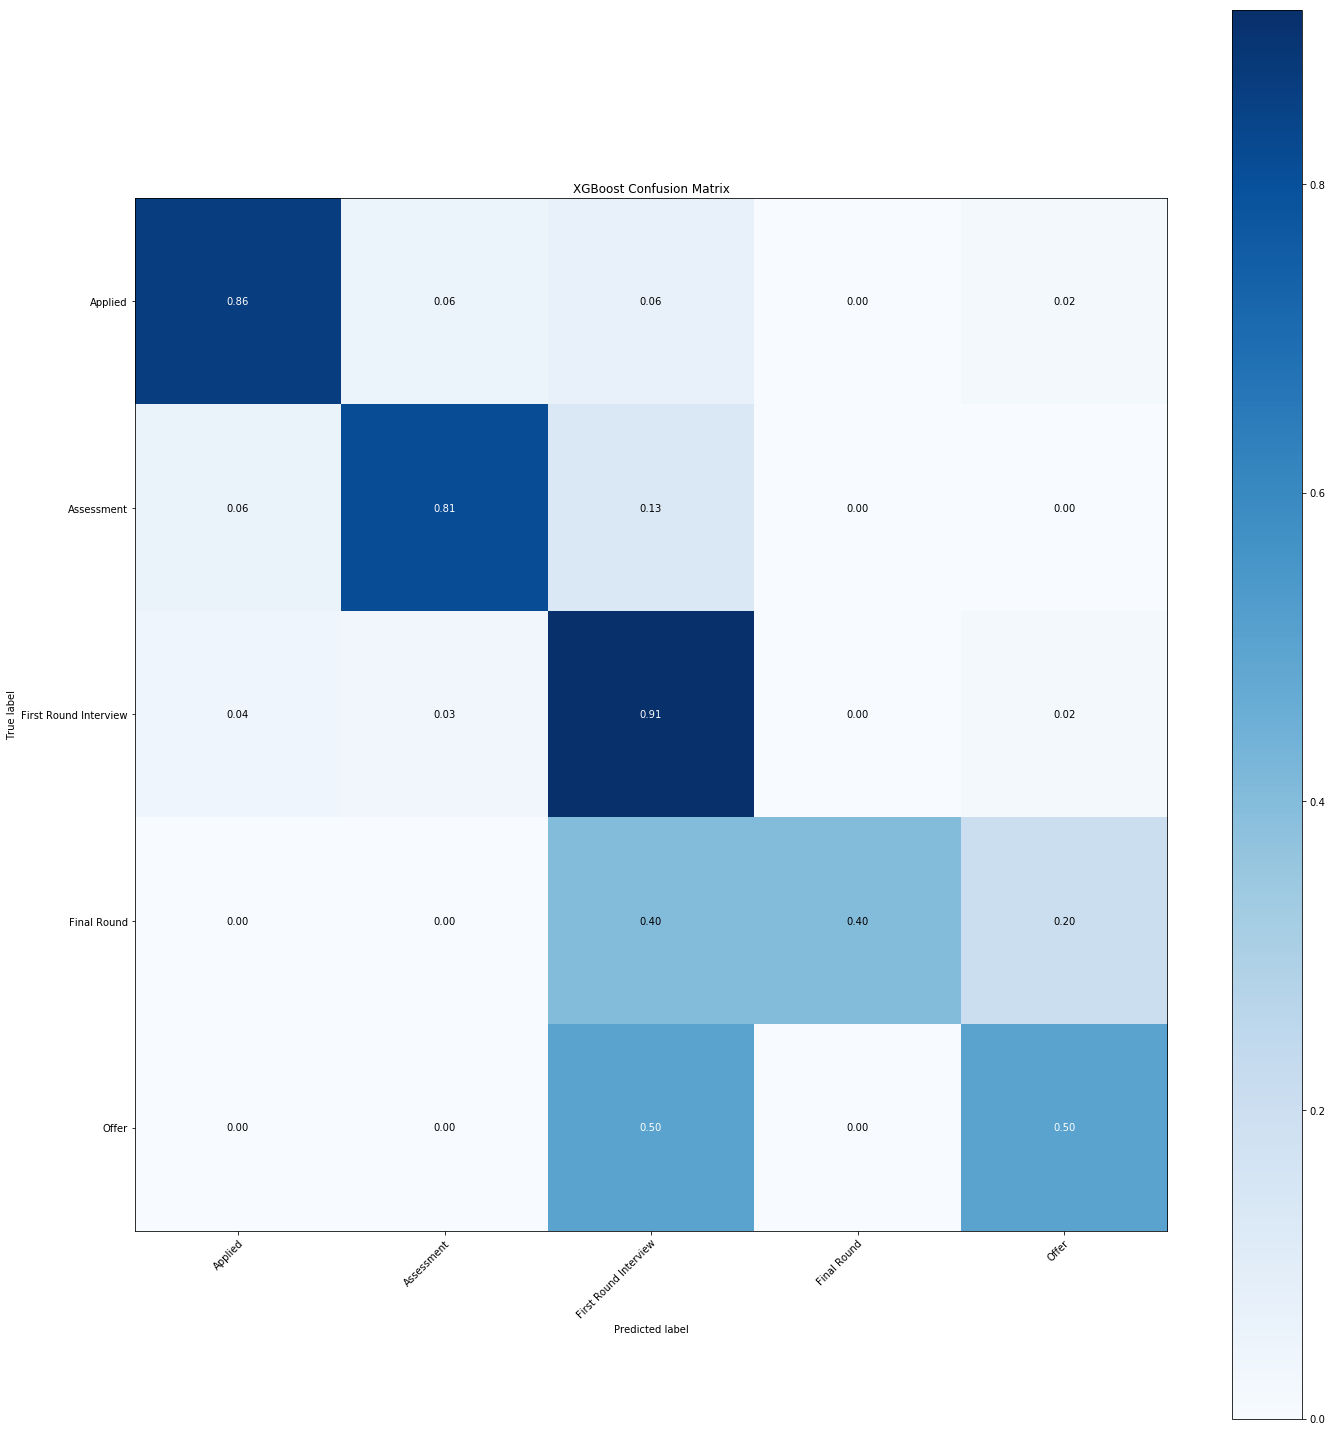

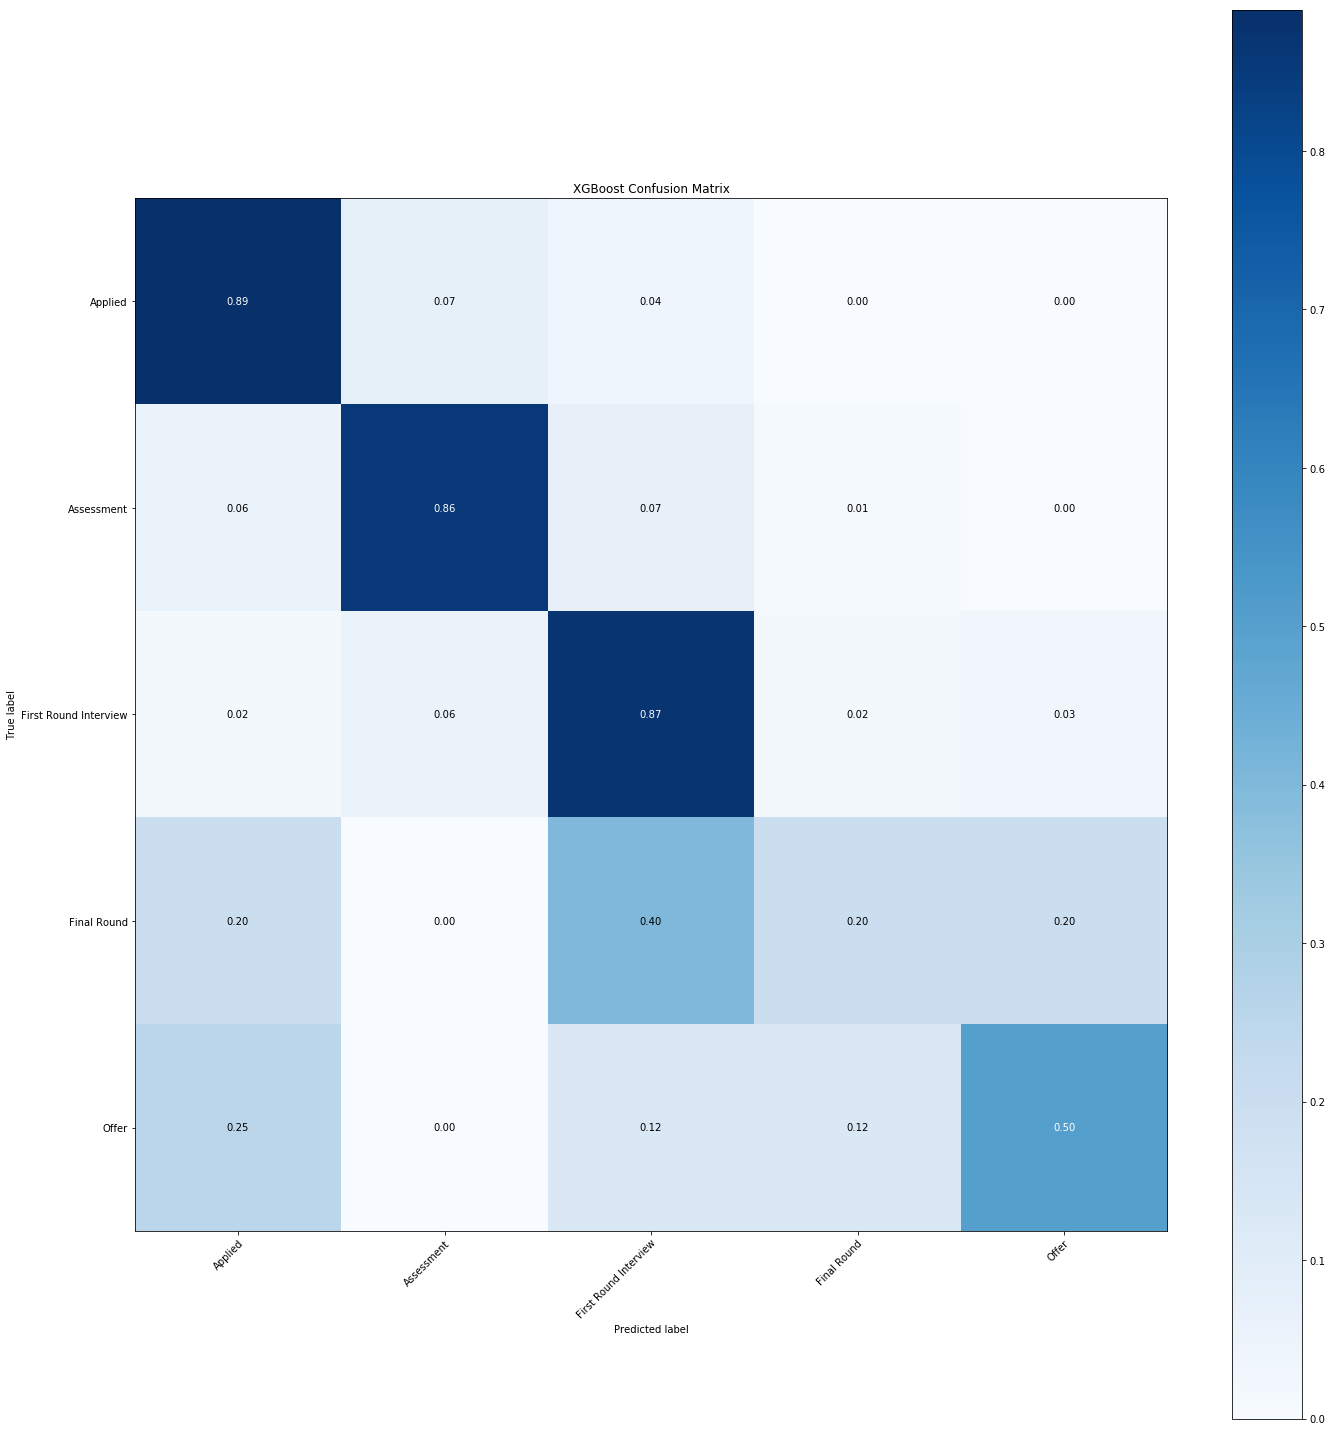

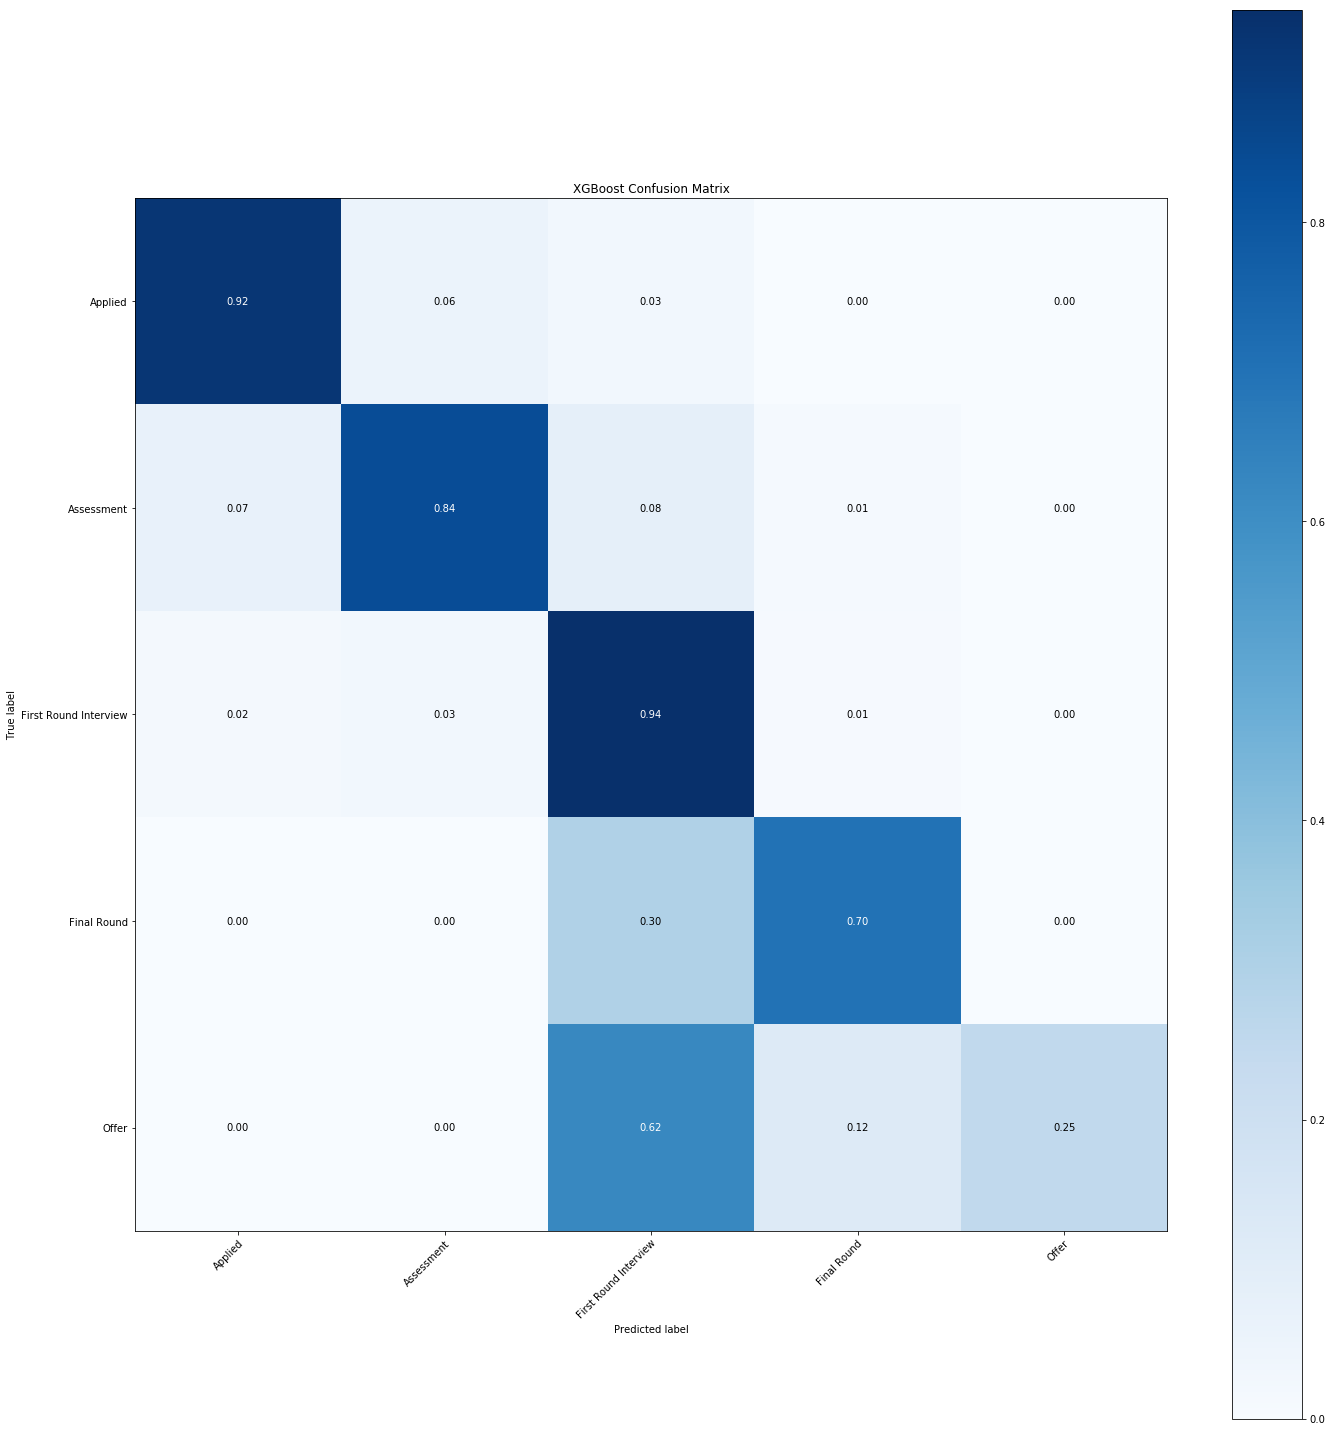

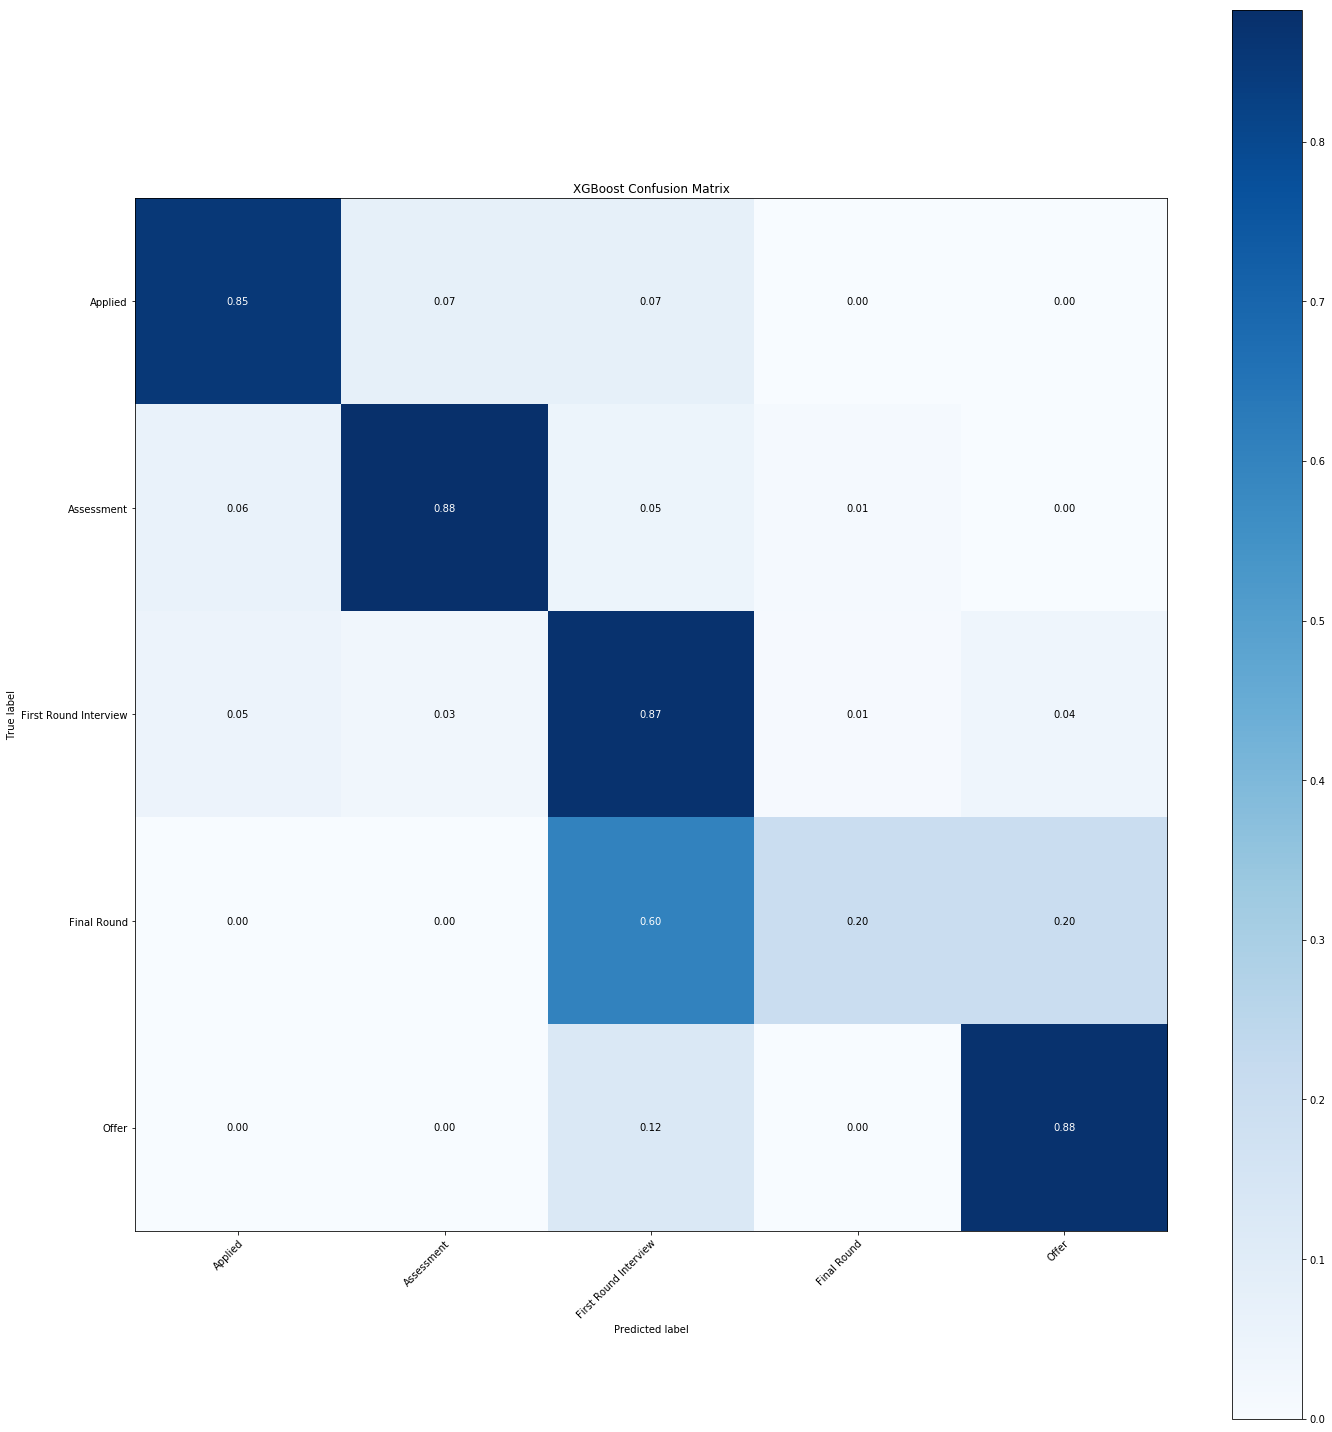

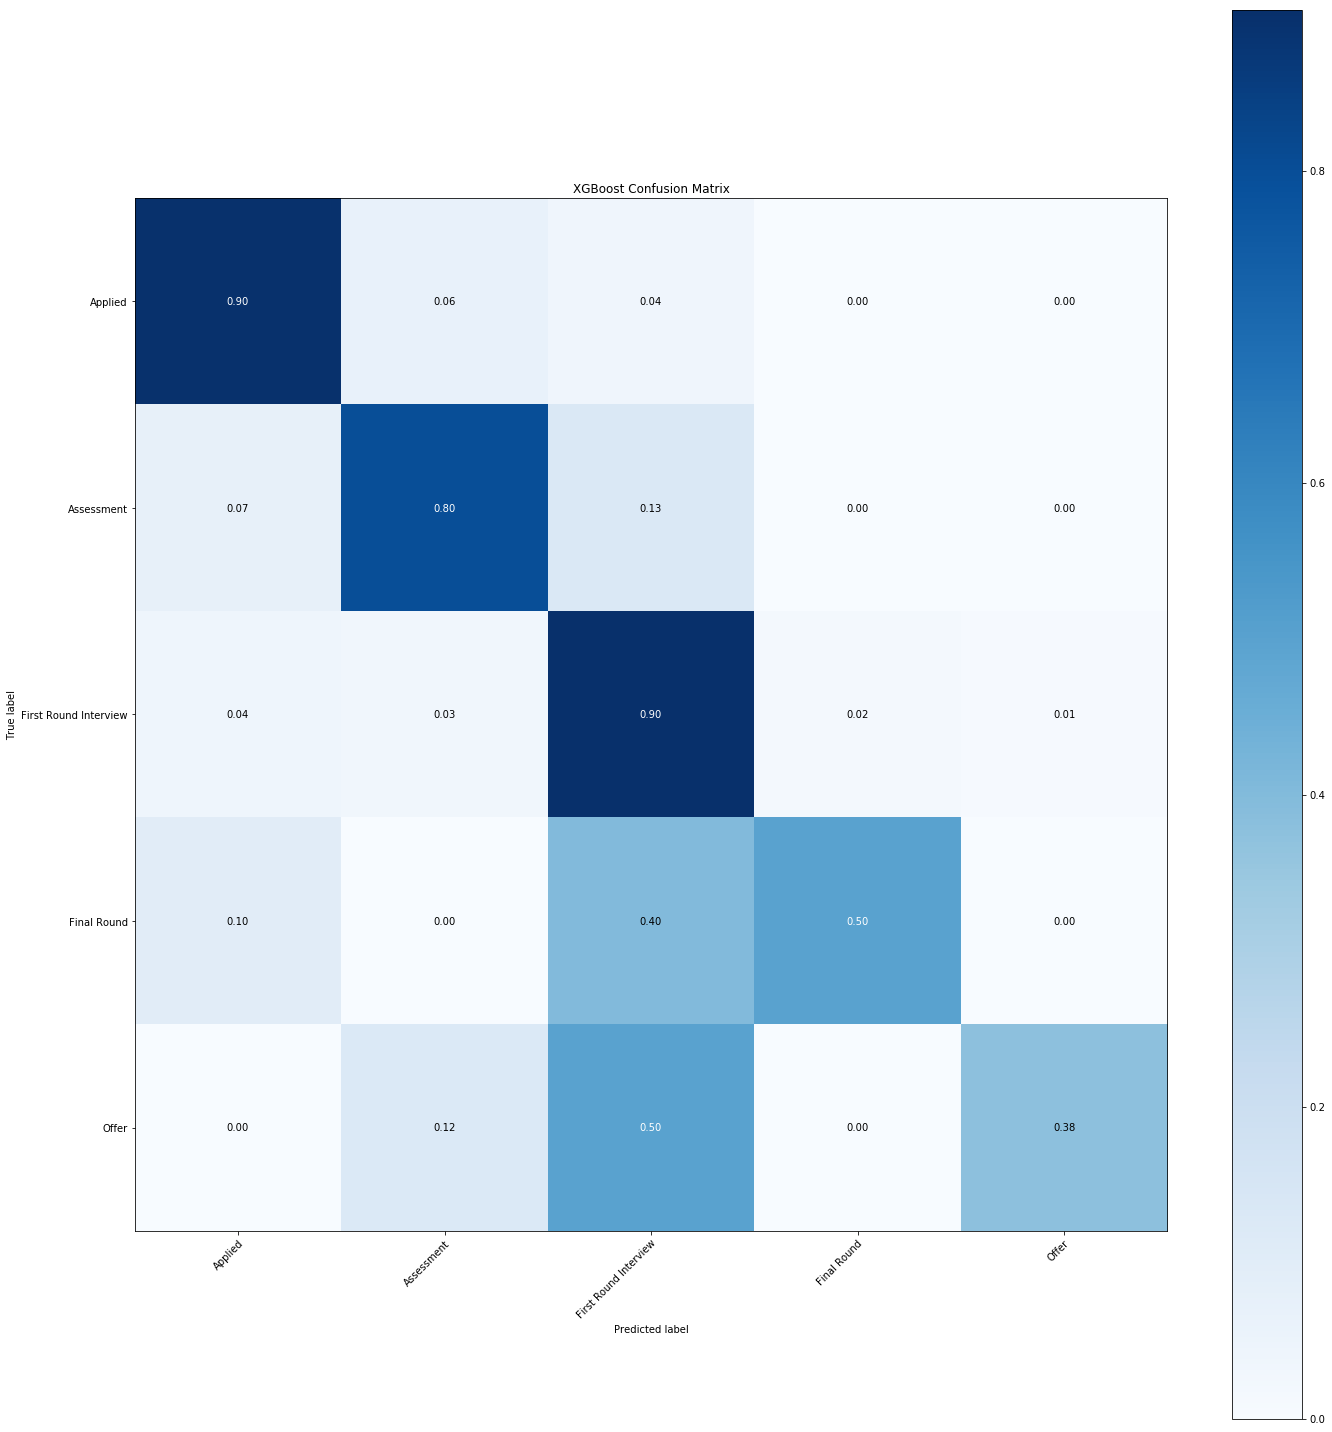

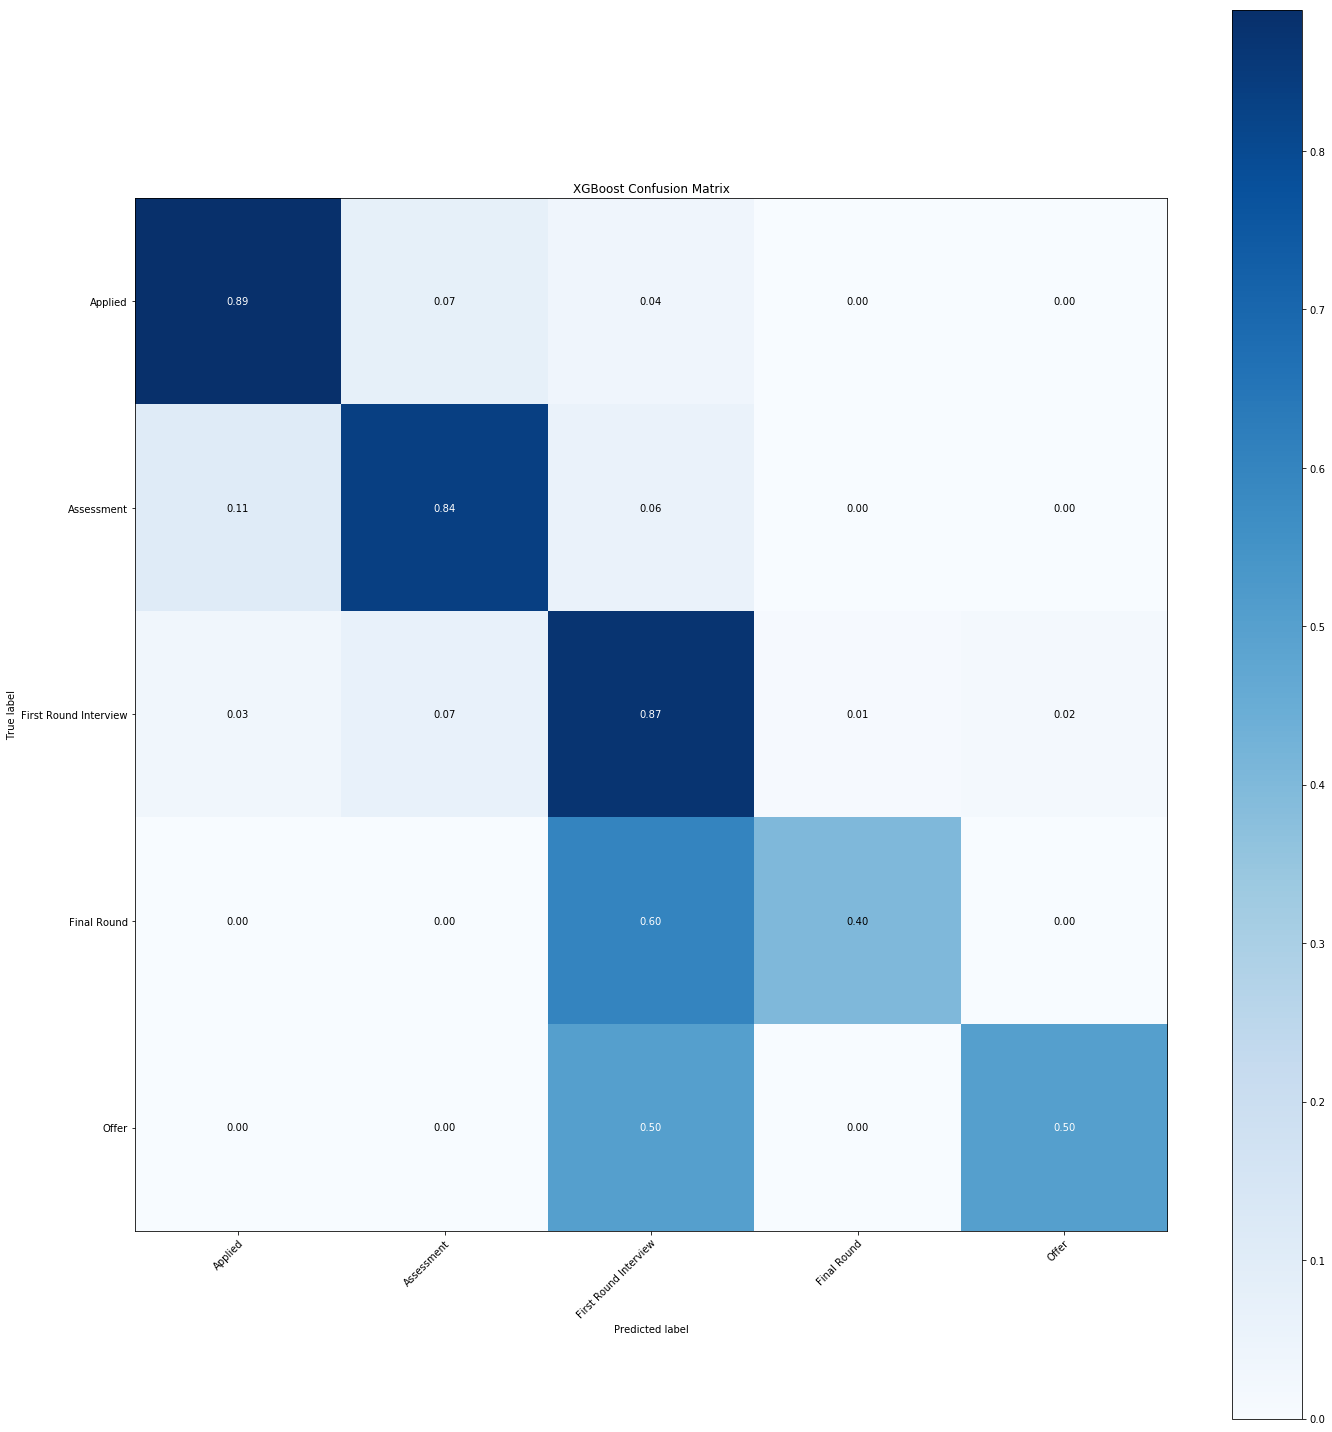

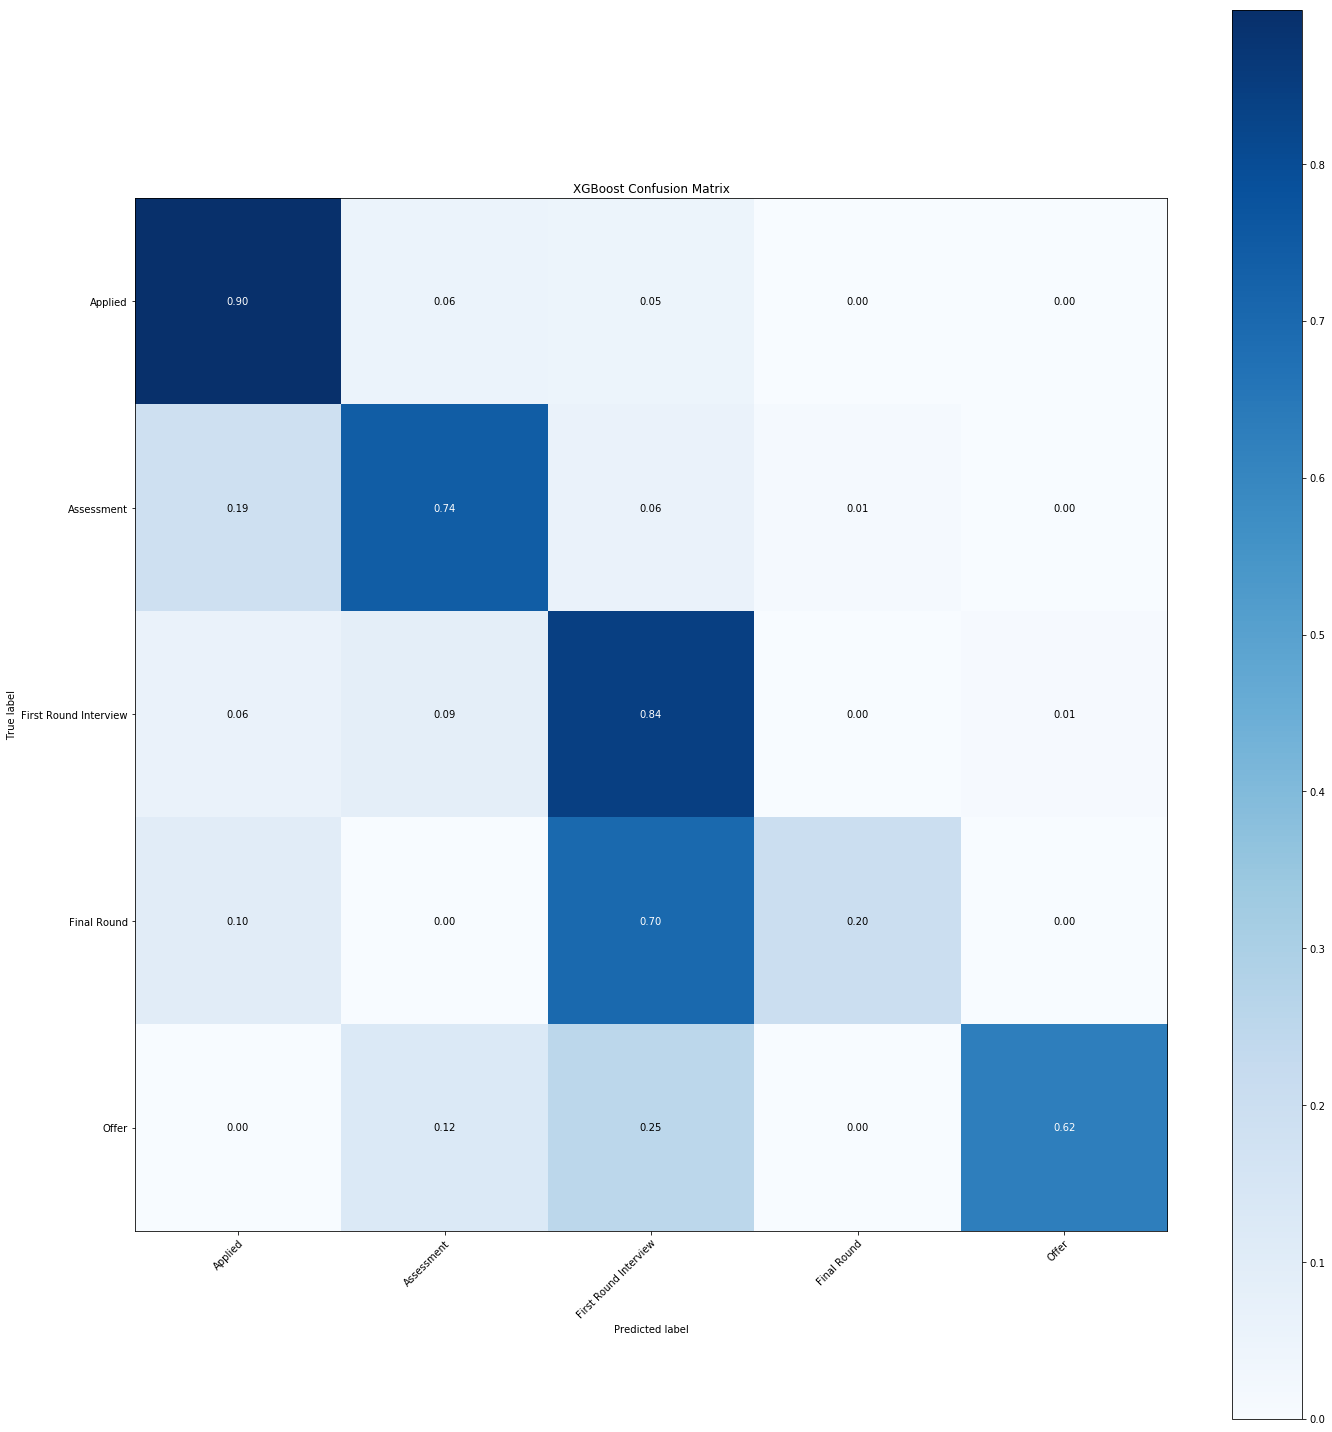

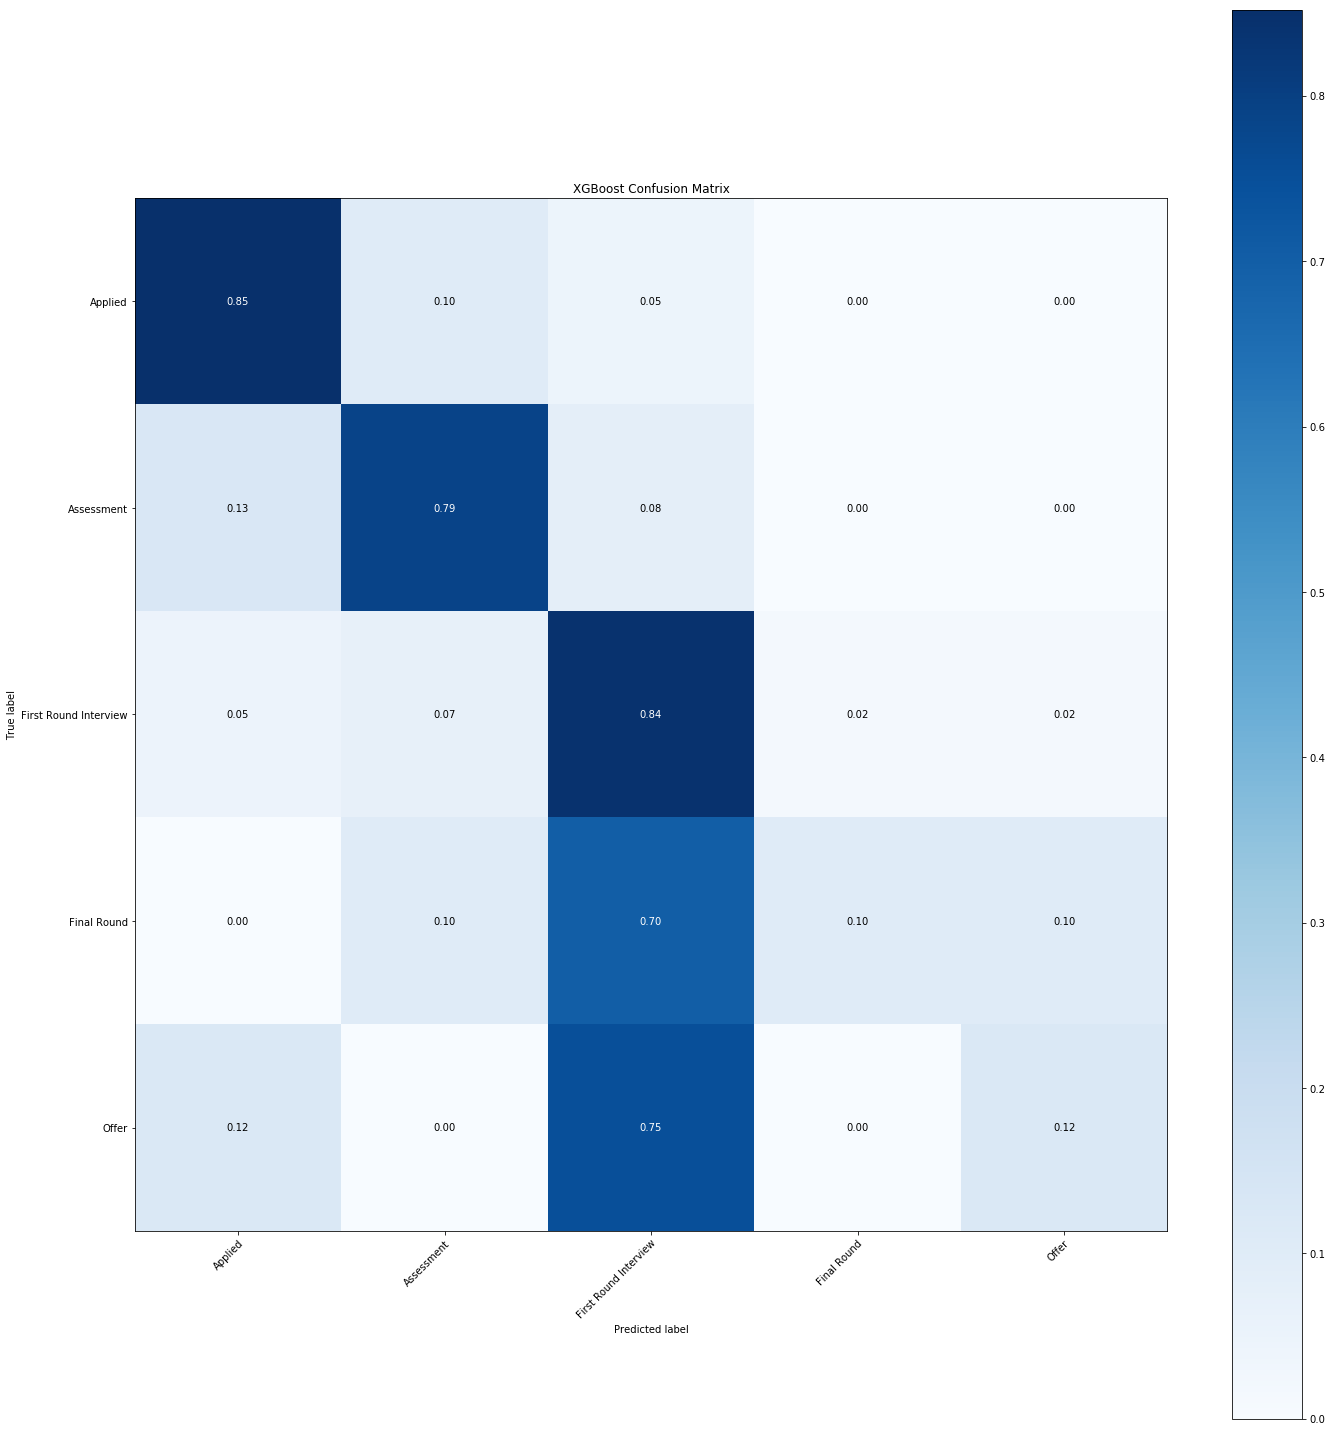

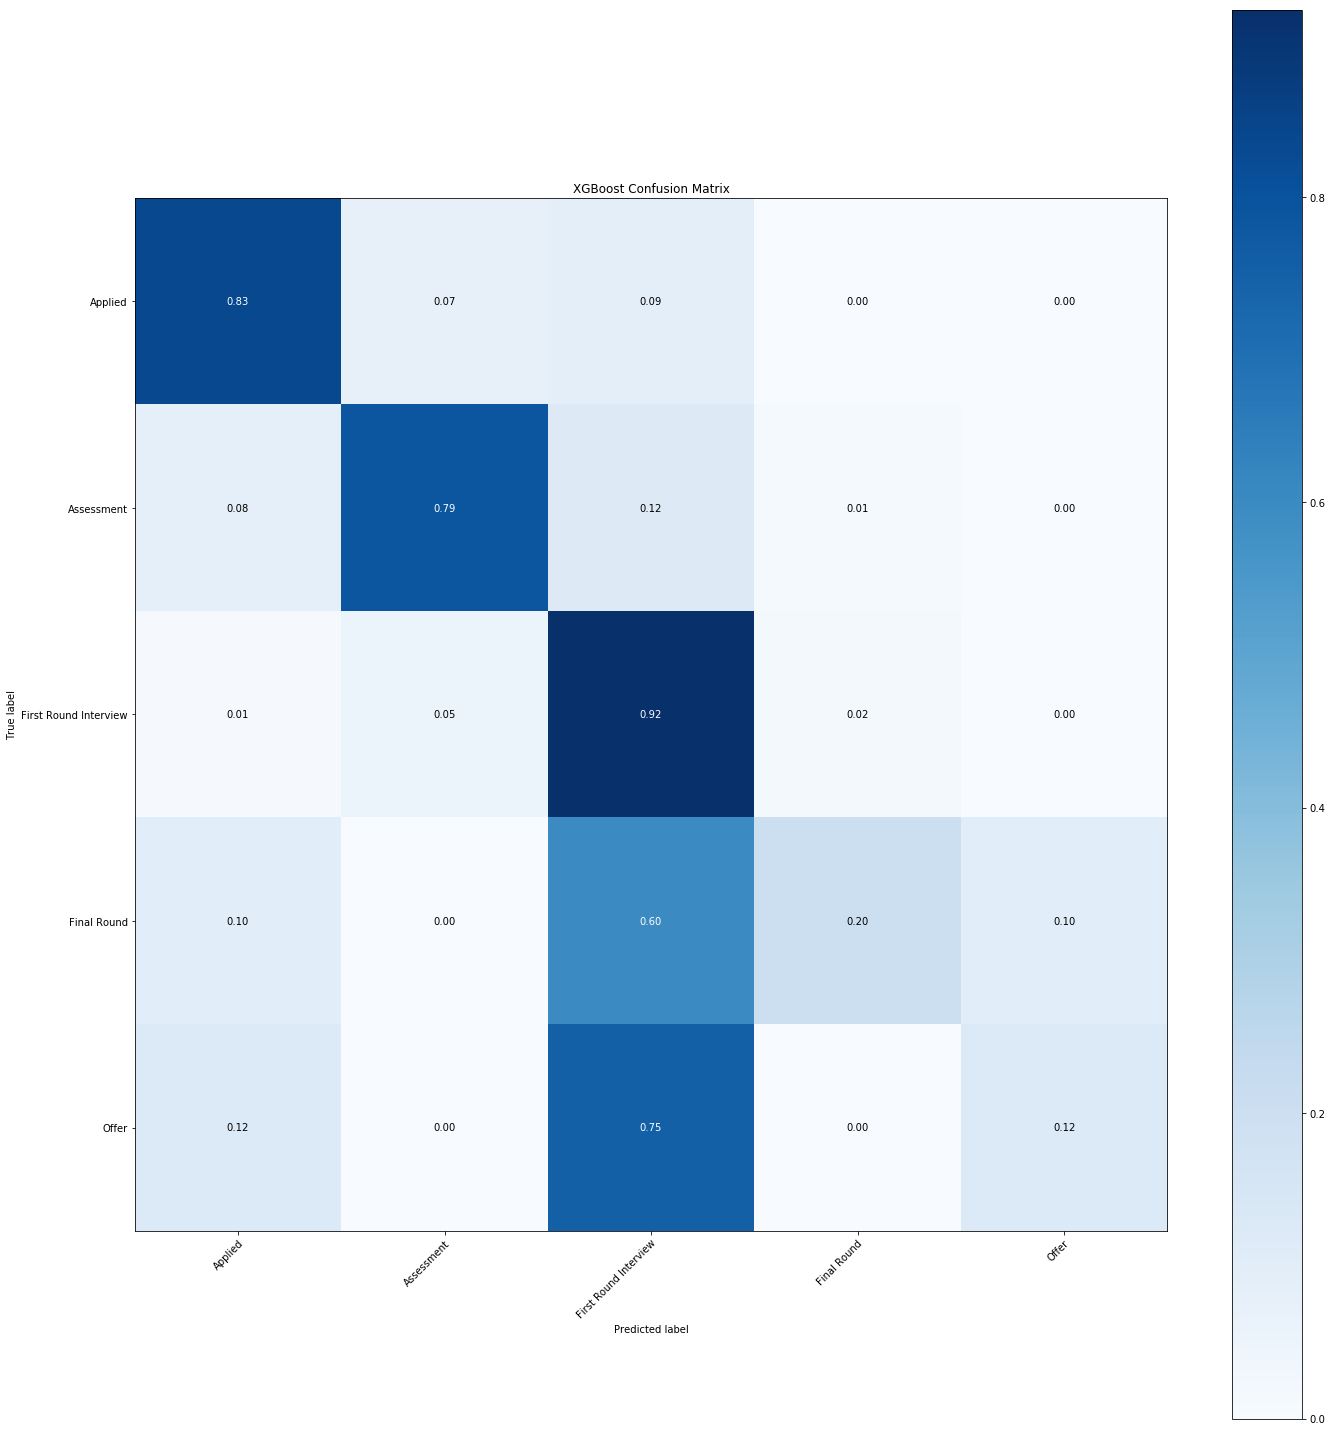

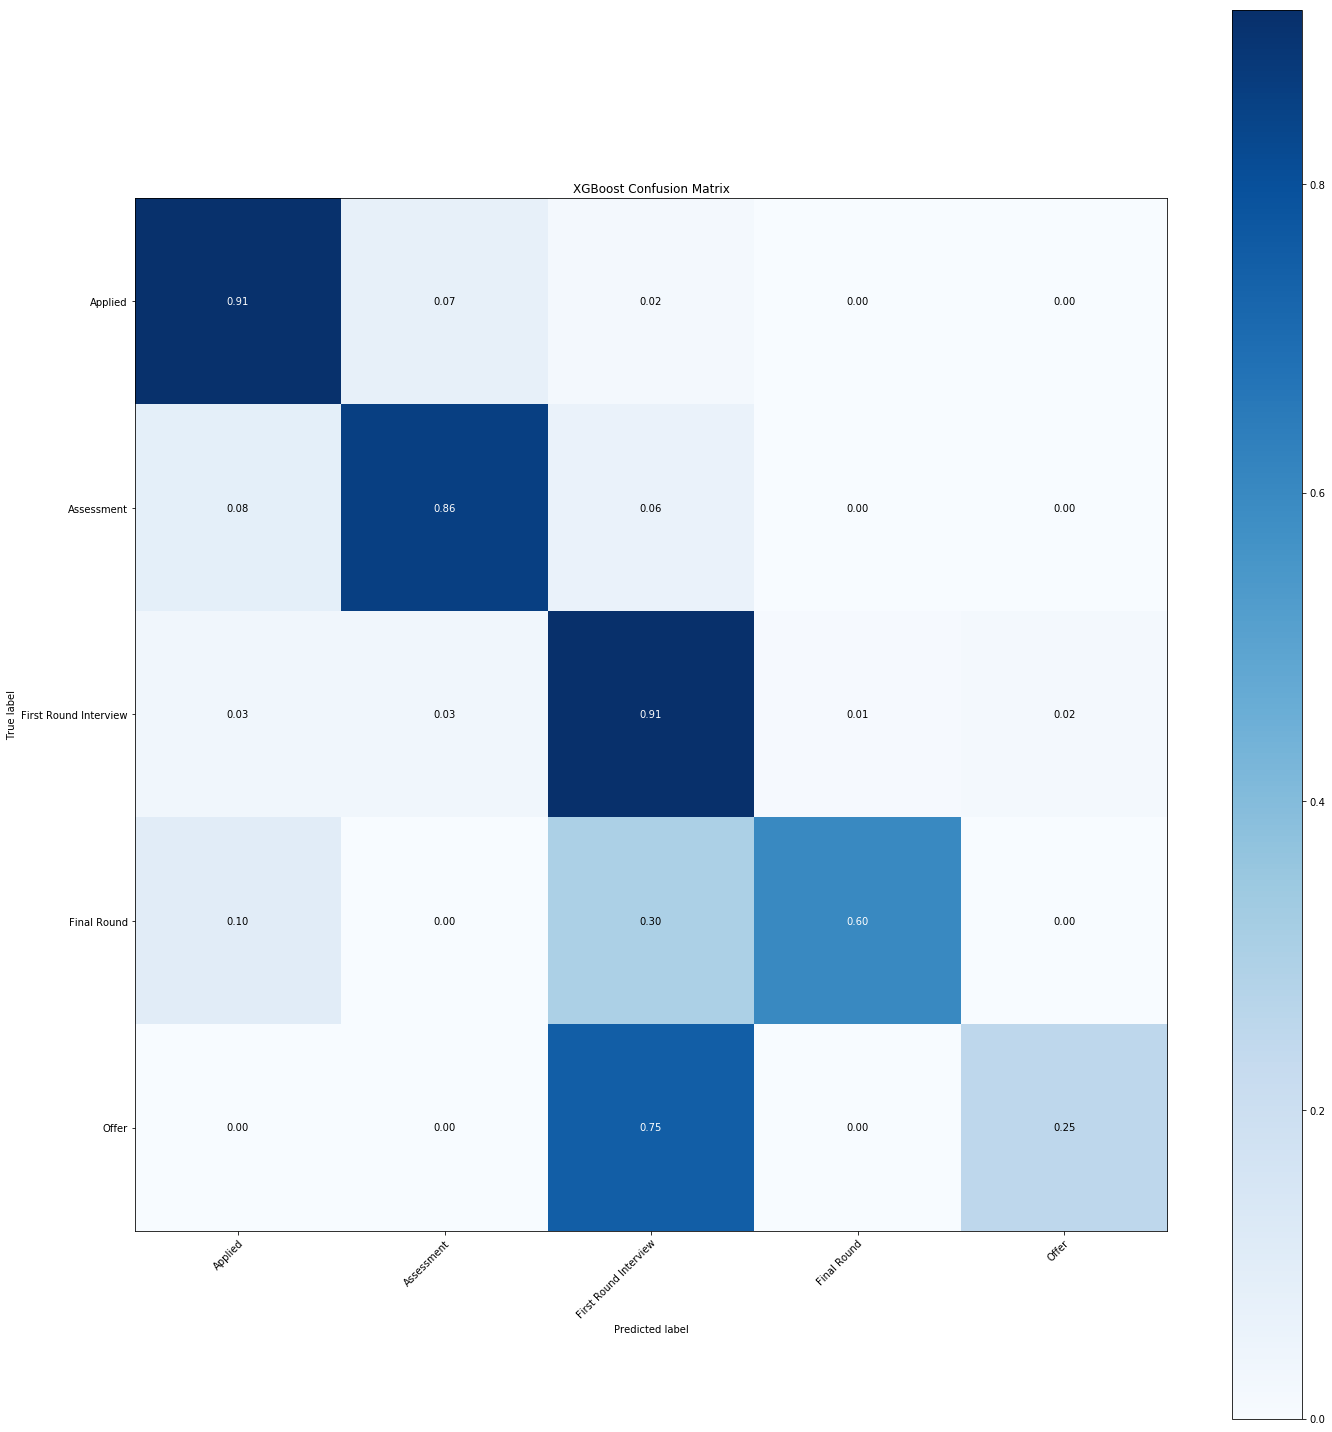

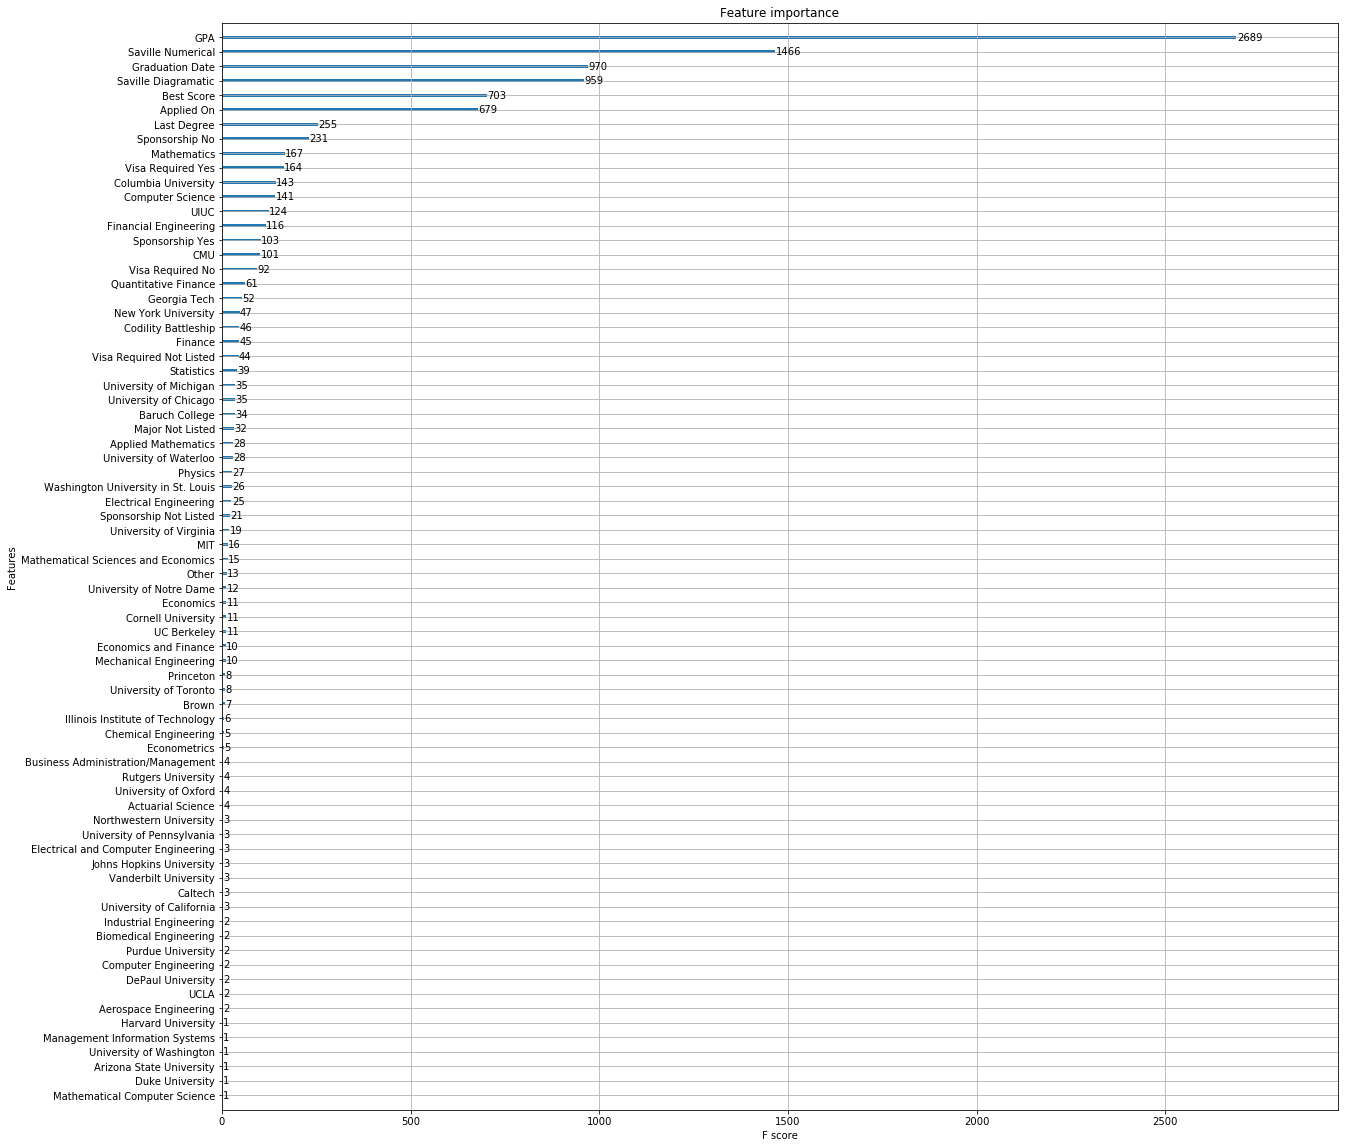

In [17]:
plt.figure(figsize=(50,50))
xgb.plot_importance(bst)
plt.show()

#### TODO 6: Try encoding the majors differently (don't treat double majors as separte applicants; should have 1 for TWO majors instead in one-hot encoding!)
#### TODO 7: Identify where y_pred != y_test and get index of X_test. Look at X_test data point and see if there are any interesting trends or patterns by hand so you can put in some manual rules. May solve the issue of model classifying as first-round interview instead of final round/offer.
#### TODO 9: Try removing some features (like Visa Required or Sponsorship) and see how model performs.
#### TODO 10: Replace missing values with mean instead of 0 (in cleaning pipeline notebook)

In [173]:
# ML Model #3: SVM

from sklearn import svm
from sklearn import grid_search

cm_pdf = matplotlib.backends.backend_pdf.PdfPages("GBT_CMs.pdf")

k = 10
avg_accuracy = 0.0
cm_fig = plt.figure()
for i in range(0, k):
    # Split dataset
    X_train, X_test, y_train, y_test = train_test_split(
        full_time_traders_appl, 
        full_time_traders_appl_labels, 
        stratify=full_time_traders_appl_labels, 
        test_size=0.2
    )
    
    # Perform gridsearch to find ideal hyperparameters
    '''
    Cs = [0.001, 0.01, 0.1, 1, 10]
    gammas = [0.001, 0.01, 0.1, 1]
    param_grid = {'C': Cs, 'gamma' : gammas}
    grid_search = grid_search.GridSearchCV(svm.SVC(kernel='rbf'), param_grid, cv=2)
    grid_search.fit(X_train, y_train)
    grid_search.best_params_
    print(grid_search.best_params_)
    '''
    
    clf = svm.SVC(gamma=.05, C=10, decision_function_shape='ovr', degree=5)
    clf.fit(X_train.values, y_train.values)
    
    y_pred_svm = clf.predict(X_test)
    model_accuracy = accuracy_score(y_pred_svm, y_test)
    avg_accuracy += model_accuracy
    print('Accuracy: ', model_accuracy)
    
    fig, ax = plot_confusion_matrix('SVM Confusion Matrix', y_pred, y_test, True)
    cm_pdf.savefig(fig)
    
cm_pdf.close()
print('Average accuracy: ', avg_accuracy / k)

Accuracy:  0.7388535031847133
Accuracy:  0.7420382165605095
Accuracy:  0.7197452229299363
Accuracy:  0.767515923566879
Accuracy:  0.7834394904458599
Accuracy:  0.7611464968152867
Accuracy:  0.7101910828025477
Accuracy:  0.7611464968152867
Accuracy:  0.7547770700636943
Accuracy:  0.7292993630573248
Average accuracy:  0.7468152866242038
